# Project 1

In [100]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



## Part 1

#### Question 1

#### (a)


Results with p =  0.003
Mean of the degree distribution =  2.886
Variance of the degree distribution =  2.91391791791792
Results with p =  0.004
Mean of the degree distribution =  4.13
Variance of the degree distribution =  3.94504504504504
Results with p =  0.01
Mean of the degree distribution =  9.834
Variance of the degree distribution =  9.71415815815816
Results with p =  0.05
Mean of the degree distribution =  50.038
Variance of the degree distribution =  49.8023583583584
Results with p =  0.1
Mean of the degree distribution =  100.592
Variance of the degree distribution =  93.424960960961

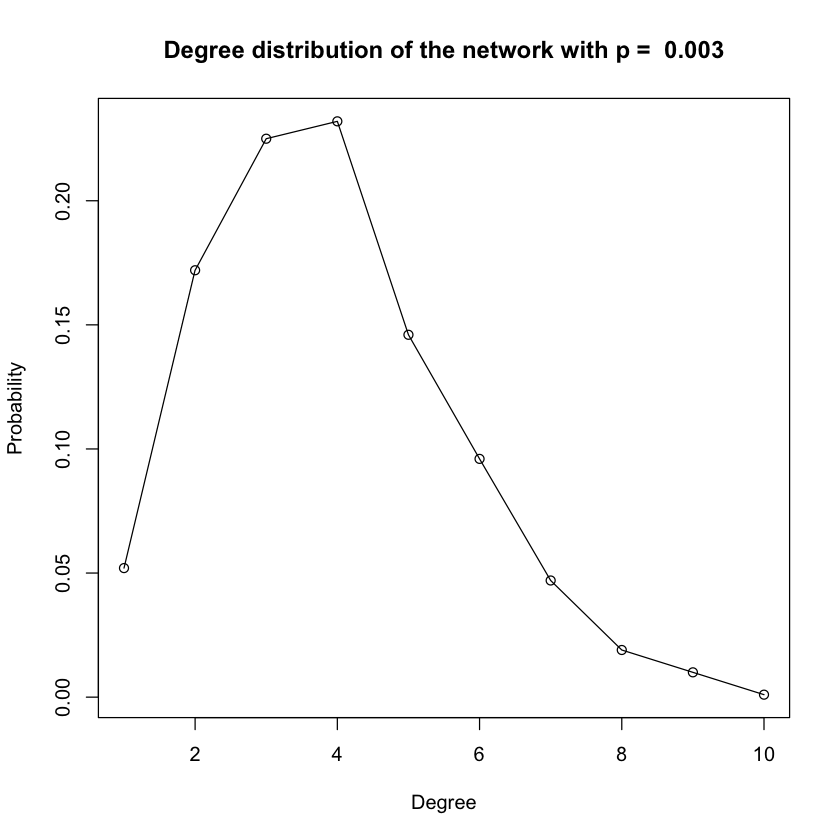

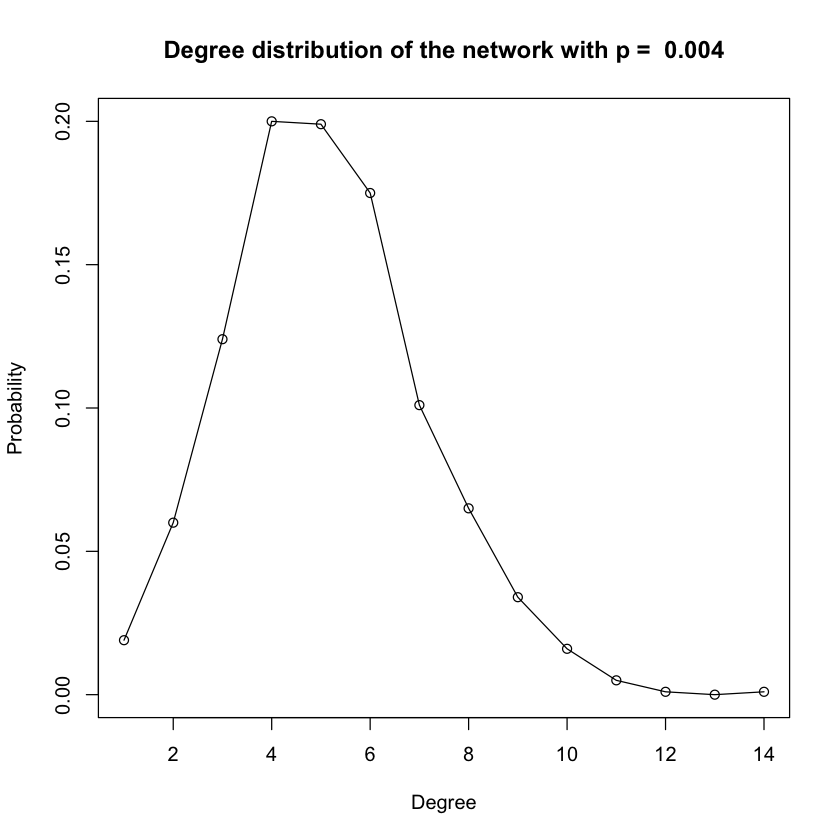

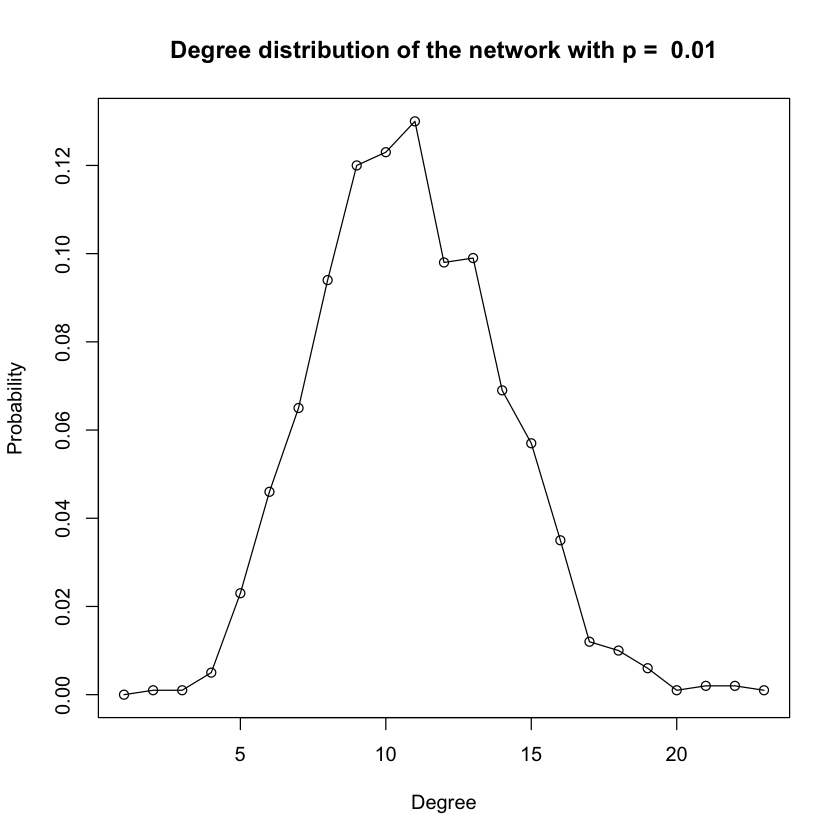

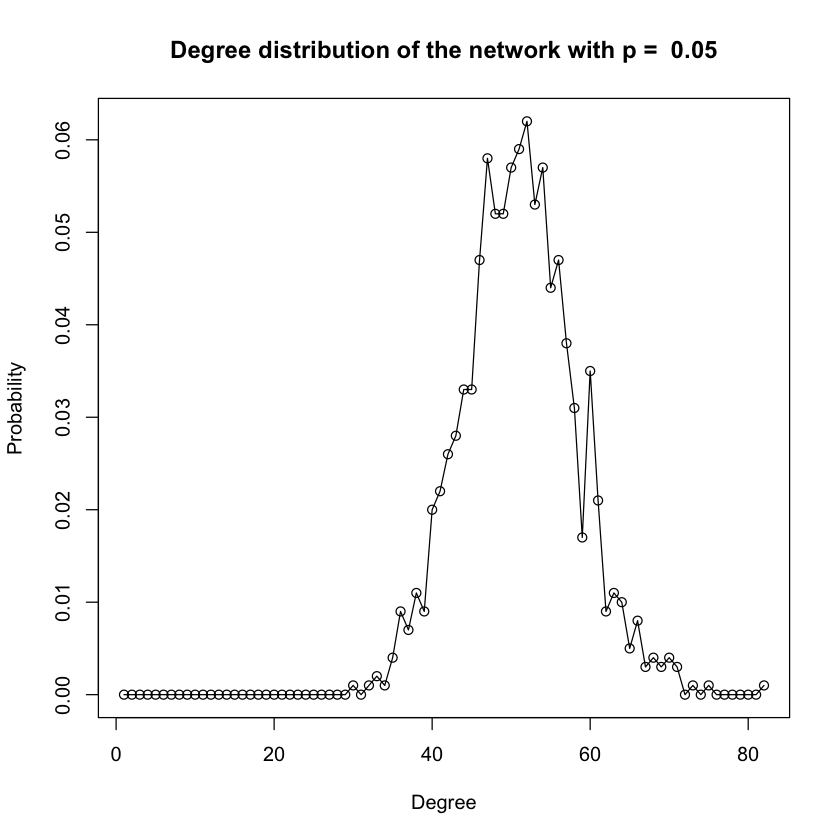

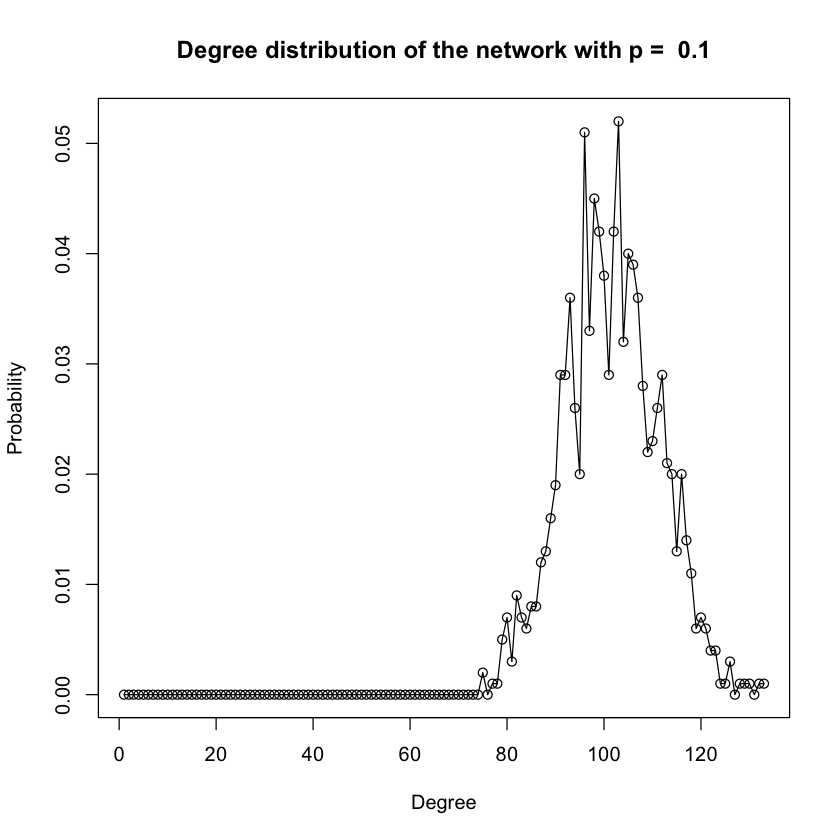

In [3]:
ps = c(0.003, 0.004, 0.01, 0.05, 0.1) # probabilities
gs = list()
for (p in ps)
{
    # Create random networks using Erdos-Renyi (ER) model
    g = erdos.renyi.game(1000, p, directed=FALSE)
    gs[[length(gs) + 1]] = g # Store the graph
    
    # Calculate mean and var
    cat(paste("\nResults with p = ", p))
    cur_mean = mean(degree(g)) # np
    cat(paste("\nMean of the degree distribution = ", cur_mean))
    cur_var = var(degree(g)) # np(1-p)
    cat(paste("\nVariance of the degree distribution = ", cur_var))
}

for (i in 1:length(ps))
{
    p = ps[i]
    g = gs[[i]]
    
    # Plot distribution
    plot(degree.distribution(g),main=paste("Degree distribution of the network with p = ", p), xlab="Degree",ylab="Probability", type="o")
    #hist(degree(g), main=paste("Histogram of the degree distribution with p = ", p),xlab="Degree",ylab="Frequency")
}

#### (b)

In [4]:
# Numerically estimate the probability that a generated network is connected.
iteration_times = 1000
for (p in ps)
{
    cat(paste("\n\nResults with p = ", p))
    connected_number = 0
    for (i in 1:iteration_times)
    {
        g = erdos.renyi.game(1000, p, directed=FALSE)
        if (is.connected(g))
        {
            connected_number = connected_number + 1
        }
    }
    cat("\nProbability that the network is connected is ", connected_number / iteration_times)
}



Results with p =  0.003
Probability that the network is connected is  0

Results with p =  0.004
Probability that the network is connected is  0

Results with p =  0.01
Probability that the network is connected is  0.957

Results with p =  0.05
Probability that the network is connected is  1

Results with p =  0.1
Probability that the network is connected is  1

In [5]:
# For one instance of the networks with that p,find the giant connected component (GCC)
for (i in 1:length(ps))
{
    p = ps[i]
    g = gs[[i]]
    cat(paste("\n\nResults with p = ", p))
    
    # Check connectivity
    cur_connected = is.connected(g)
    cat(paste('\nIs the graph connected: ', cur_connected))
    
    # Find GCC
    g.components = clusters(g)
    ix = which.max(g.components$csize) # Idx of the largest component
    g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC

    # Find GCC features
    cat(paste("\nNumber of nodes of GCC: ", vcount(g.giant)))
    cat(paste("\nNumber of edges of GCC: ", ecount(g.giant)))

    # Find diameter
    cur_diameter = diameter(g.giant, directed = FALSE)
    cat(paste("\nDiameter of GCC: ", cur_diameter))
}



Results with p =  0.003
Is the graph connected:  FALSE
Number of nodes of GCC:  940
Number of edges of GCC:  1439
Diameter of GCC:  15

Results with p =  0.004
Is the graph connected:  FALSE
Number of nodes of GCC:  981
Number of edges of GCC:  2065
Diameter of GCC:  11

Results with p =  0.01
Is the graph connected:  TRUE
Number of nodes of GCC:  1000
Number of edges of GCC:  4917
Diameter of GCC:  6

Results with p =  0.05
Is the graph connected:  TRUE
Number of nodes of GCC:  1000
Number of edges of GCC:  25019
Diameter of GCC:  3

Results with p =  0.1
Is the graph connected:  TRUE
Number of nodes of GCC:  1000
Number of edges of GCC:  50296
Diameter of GCC:  3

#### (c)

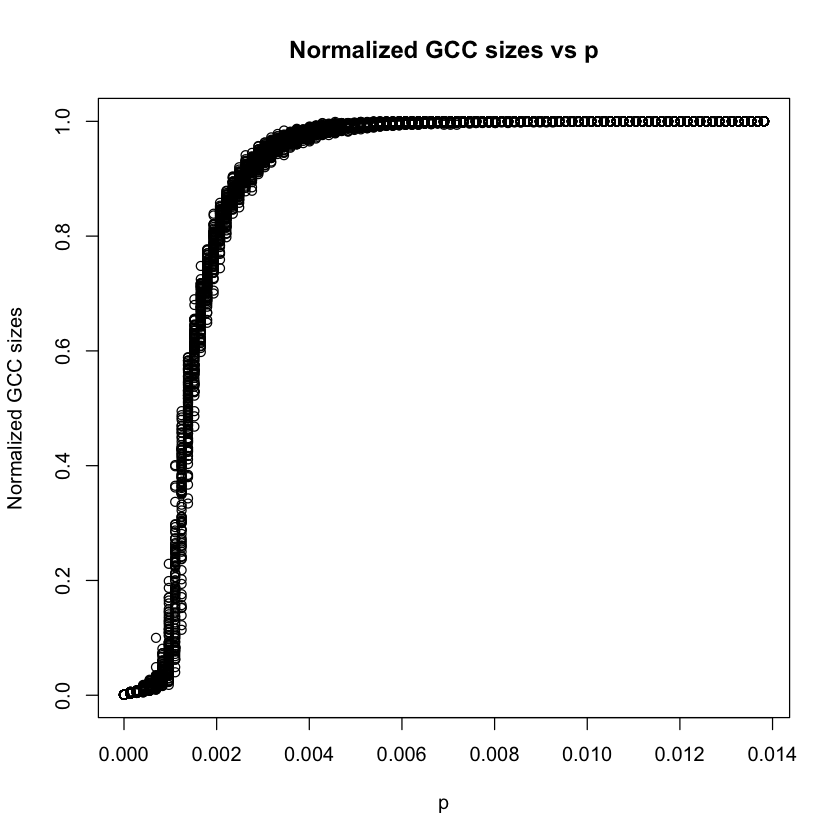

In [142]:
# Graph in ln(n)/n +- 80%
center = log(1000, base=exp(1)) / 1000
range = 1
p_reg_size = 100
p_reg = seq(center * (1 - range), center * (1 + range), 2 * center * range / p_reg_size)
normalized_gcc_sizes = c() # Store GCC sizes
p_plot = rep(p_reg, times=1, each=100) # Create 100 networks for each p
for (p in p_plot)
{
    # Create random networks using Erdos-Renyi (ER) model
    g = erdos.renyi.game(1000, p, directed=FALSE)
    
    # Find GCC
    g.components = clusters(g)
    ix = which.max(g.components$csize) # Idx of the largest component
    g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
    
    # GCC size
    gcc_size = vcount(g.giant)
    normalized_gcc_sizes = c(normalized_gcc_sizes, gcc_size / 1000)
}
# Plot
plot(p_plot, normalized_gcc_sizes, main="Normalized GCC sizes vs p", xlab="p", ylab="Normalized GCC sizes")

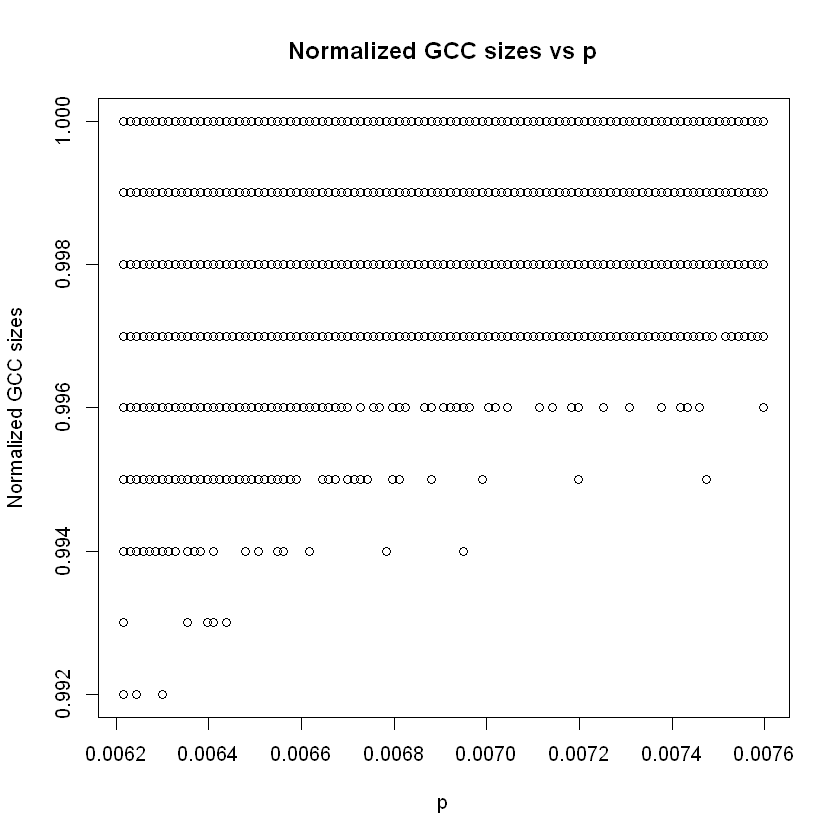

In [41]:
# Graph in ln(n)/n +- 10% (zooming)
center = log(1000, base=exp(1)) / 1000
range = 0.1
p_reg_size = 100
p_reg = seq(center * (1 - range), center * (1 + range), 2 * center * range / p_reg_size)
normalized_gcc_sizes = c() # Store GCC sizes
p_plot = rep(p_reg, times=1, each=100) # Create 100 networks for each p
for (p in p_plot)
{
    # Create random networks using Erdos-Renyi (ER) model
    g = erdos.renyi.game(1000, p, directed=FALSE)
    
    # Find GCC
    g.components = clusters(g)
    ix = which.max(g.components$csize) # Idx of the largest component
    g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
    
    # GCC size
    gcc_size = vcount(g.giant)
    normalized_gcc_sizes = c(normalized_gcc_sizes, gcc_size / 1000)
}
# Plot
plot(p_plot, normalized_gcc_sizes, main="Normalized GCC sizes vs p", xlab="p", ylab="Normalized GCC sizes")

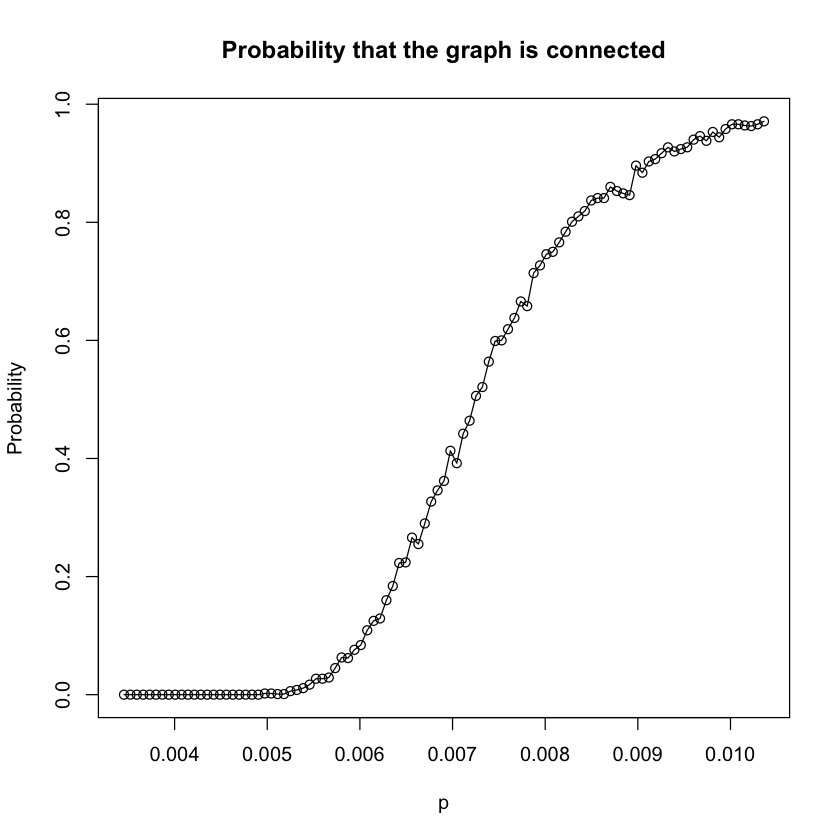

In [6]:
# Check the probability that the network is connected to define the emergence of GCC
center = log(1000, base=exp(1)) / 1000
range = 0.5
p_reg_size = 100
p_reg = seq(center * (1 - range), center * (1 + range), 2 * center * range / p_reg_size)
normalized_gcc_sizes = c() # Store GCC sizes
connected_probs = c()
iteration_times = 1000
for (p in p_reg)
{
    connected_number = 0
    for (i in seq(1, iteration_times))
    {
        # Create random networks using Erdos-Renyi (ER) model
        g = erdos.renyi.game(1000, p, directed=FALSE)
        if (is.connected(g))
        {
            connected_number = connected_number + 1
        }
    }
    connected_probs = c(connected_probs, connected_number / iteration_times)
}
# Plot
plot(p_reg, connected_probs, main="Probability that the graph is connected", xlab="p", ylab="Probability", type="o")

[1] "inflection point is "
[1] 0.007529453


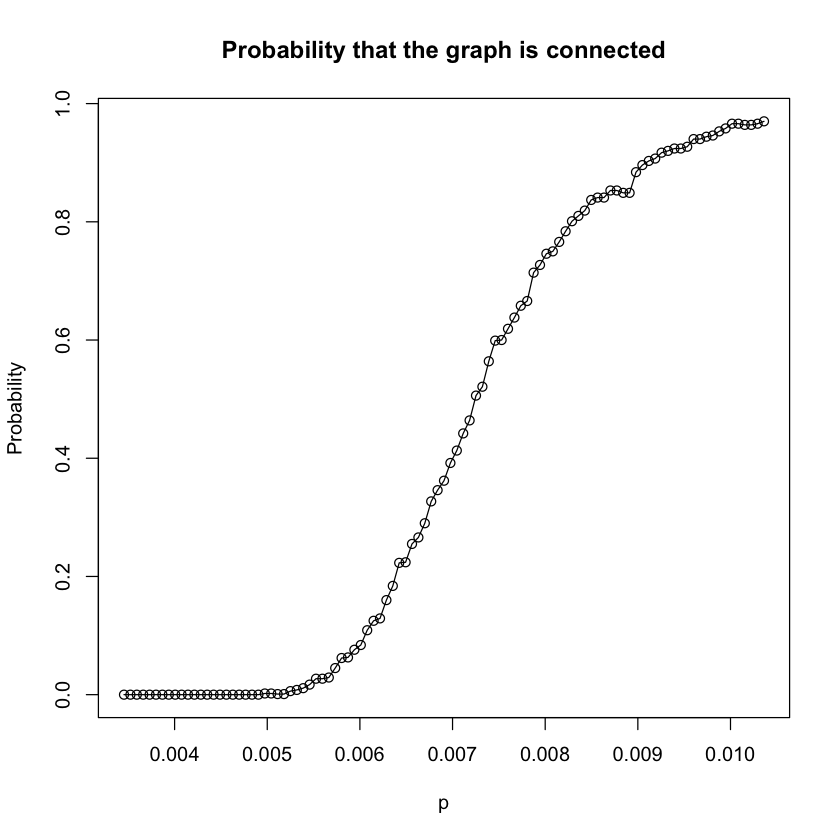

In [20]:
# definition the emergence : inflection point

soomthed_probs = smooth(connected_probs, kind = "3R")
# Plot
plot(p_reg, soomthed_probs, main="Probability that the graph is connected", xlab="p", ylab="Probability", type="o")
# find inflection point
dy <- diff(connected_probs) 
d2y <- diff(dy)
# which(d2y==0)
print("inflection point is ")
print(p_reg[60])

#### (d)

#### (i)

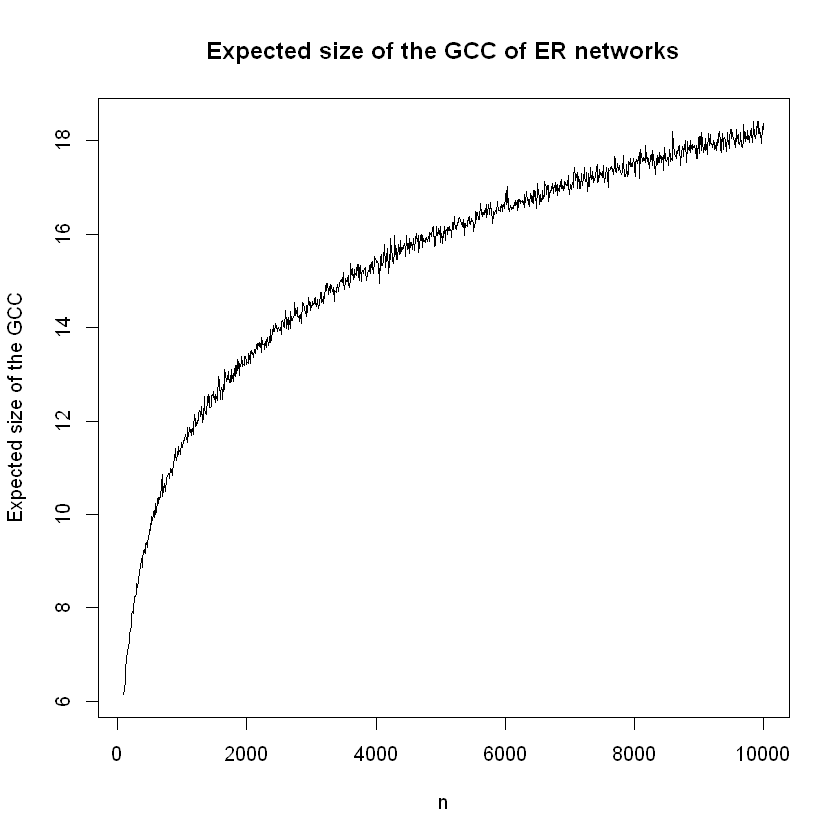

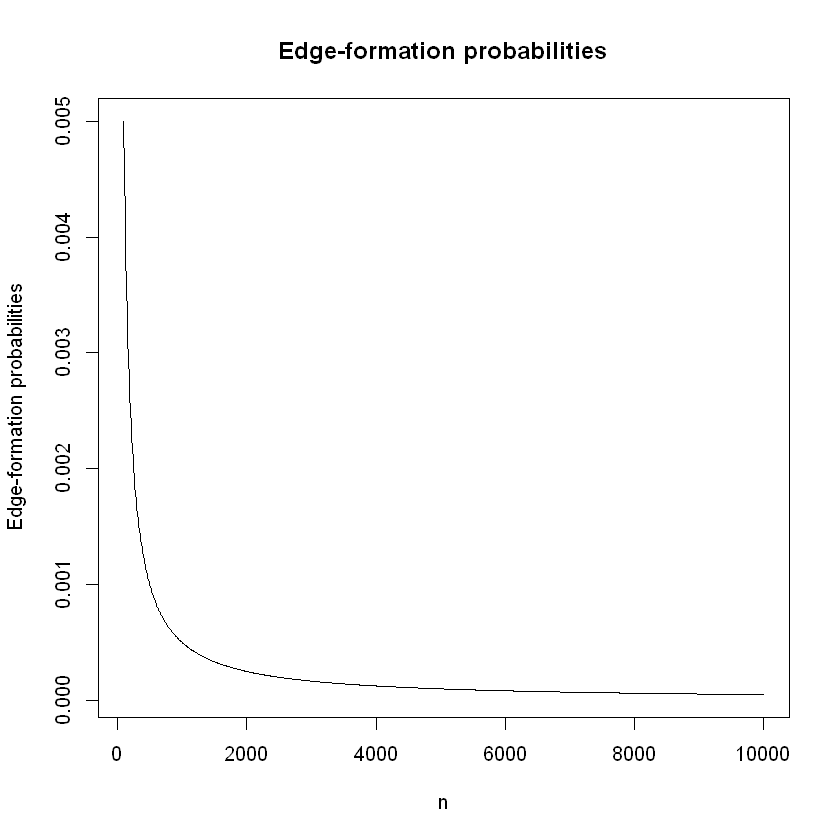

In [42]:
avg_degree = 0.5
ns = seq(100, 10000, 10)
expected_gcc_sizes = c()
ps = c()
for (n in ns)
{
    p = avg_degree / n
    ps = c(ps, p)
    gcc_sizes = c()
    for (i in seq(1, 1000)) # Generate 1000 networks for expected GCC sizes
    {
        g = erdos.renyi.game(n, p, directed=FALSE)
        # Find GCC
        g.components = clusters(g)
        ix = which.max(g.components$csize) # Idx of the largest component
        g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
        # GCC size
        gcc_size = vcount(g.giant)
        gcc_sizes = c(gcc_sizes, gcc_size)
    }
    expected_gcc_size = mean(gcc_sizes)
    expected_gcc_sizes = c(expected_gcc_sizes, expected_gcc_size)
}

# Plot
plot(ns, expected_gcc_sizes, main="Expected size of the GCC of ER networks", xlab="n", ylab="Expected size of the GCC", type="l")
plot(ns, ps, main="Edge-formation probabilities", xlab="n", ylab="Edge-formation probabilities", type="l")

#### (ii)

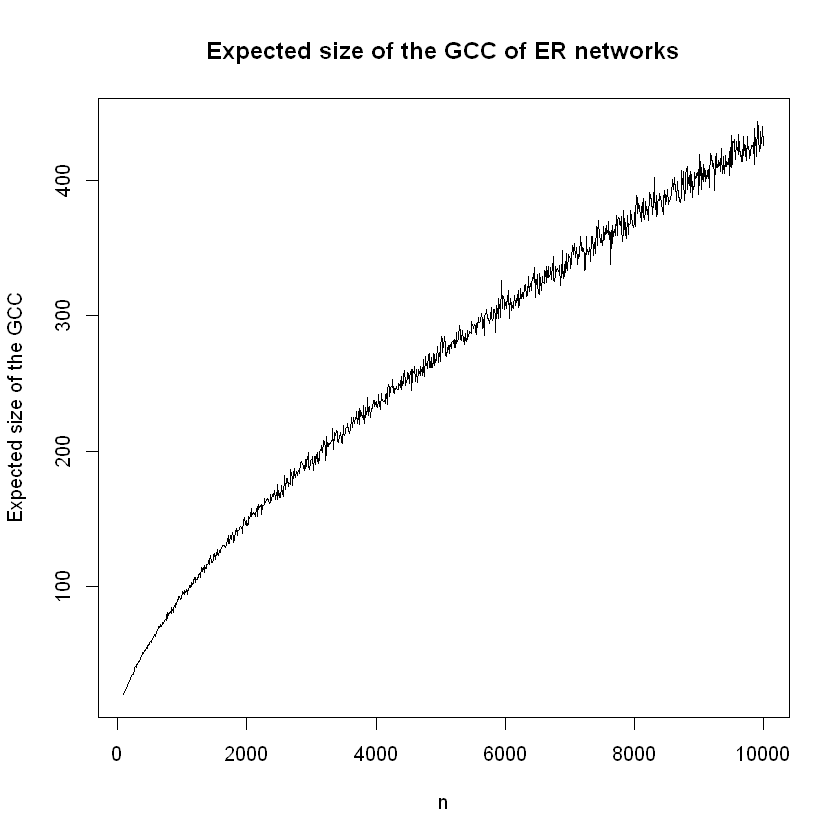

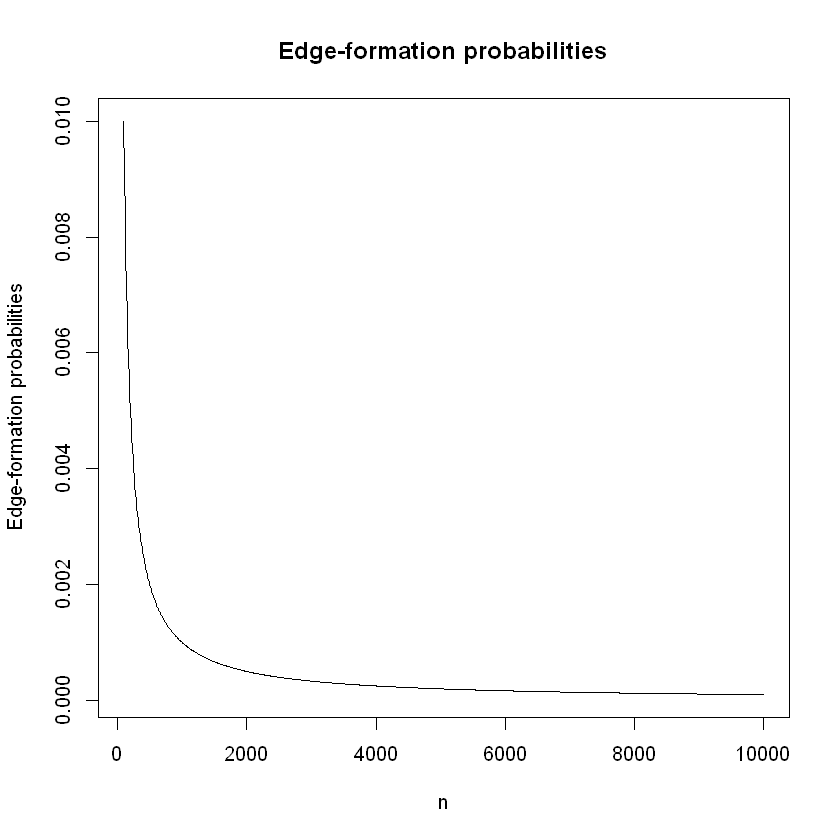

In [51]:
avg_degree = 1
ns = seq(100, 10000, 10)
expected_gcc_sizes = c()
ps = c()
for (n in ns)
{
    p = avg_degree / n
    ps = c(ps, p)
    gcc_sizes = c()
    for (i in seq(1, 1000)) # Generate 1000 networks for expected GCC sizes
    {
        g = erdos.renyi.game(n, p, directed=FALSE)
        # Find GCC
        g.components = clusters(g)
        ix = which.max(g.components$csize) # Idx of the largest component
        g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
        # GCC size
        gcc_size = vcount(g.giant)
        gcc_sizes = c(gcc_sizes, gcc_size)
    }
    expected_gcc_size = mean(gcc_sizes)
    expected_gcc_sizes = c(expected_gcc_sizes, expected_gcc_size)
}

# Plot
plot(ns, expected_gcc_sizes, main="Expected size of the GCC of ER networks", xlab="n", ylab="Expected size of the GCC", type="l")
plot(ns, ps, main="Edge-formation probabilities", xlab="n", ylab="Edge-formation probabilities", type="l")

#### (iii)

In [19]:
avg_degrees = c(1.1, 1.2, 1.3)
ns = seq(100, 10000, 10)
all_expected_gcc_sizes = list()
all_ps = list()
for (avg_degree in avg_degrees)
{
    cat(paste("\nCalculating results with c = ", avg_degree))
    expected_gcc_sizes = c()
    ps = c()
    for (n in ns)
    {
        p = avg_degree / n
        ps = c(ps, p)
        gcc_sizes = c()
        for (i in seq(1, 100)) # Generate 100 networks for expected GCC sizes
        {
            g = erdos.renyi.game(n, p, directed=FALSE)
            # Find GCC
            g.components = clusters(g)
            ix = which.max(g.components$csize) # Idx of the largest component
            g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
            # GCC size
            gcc_size = vcount(g.giant)
            gcc_sizes = c(gcc_sizes, gcc_size)
        }
        expected_gcc_size = mean(gcc_sizes)
        expected_gcc_sizes = c(expected_gcc_sizes, expected_gcc_size)
    }
    all_expected_gcc_sizes[[length(all_expected_gcc_sizes) + 1]] = expected_gcc_sizes
    all_ps[[length(all_ps) + 1]] = ps
}


Calculating results with c =  1.1
Calculating results with c =  1.2
Calculating results with c =  1.3

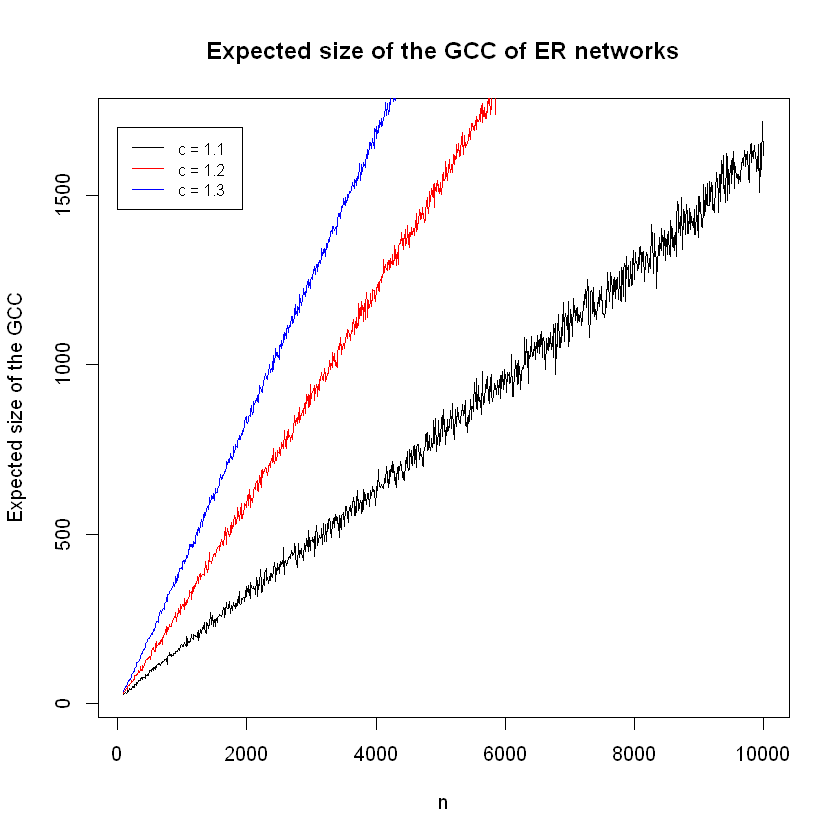

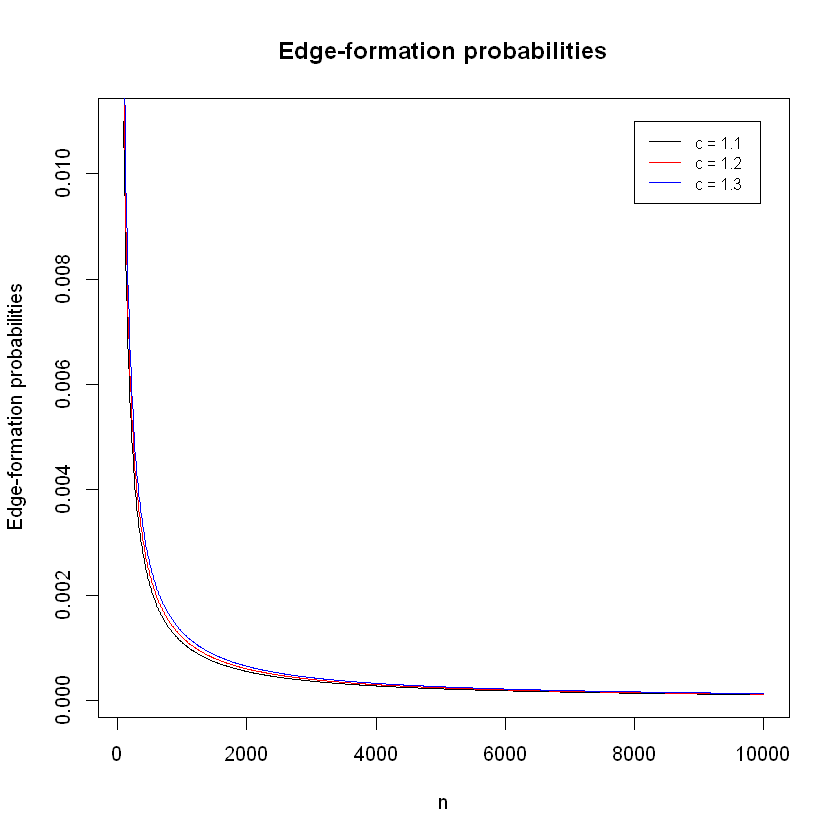

In [20]:
# Plot
plot(ns, all_expected_gcc_sizes[[1]], main="Expected size of the GCC of ER networks", xlab="n", ylab="Expected size of the GCC", type="l")
lines(ns, all_expected_gcc_sizes[[2]], col="red", type="l")
lines(ns, all_expected_gcc_sizes[[3]], col="blue", type="l")
legend(0, 1700, legend=c("c = 1.1", "c = 1.2", "c = 1.3"), col=c("black", "red", "blue"), lty=1, cex=0.8)

plot(ns, all_ps[[1]], main="Edge-formation probabilities", xlab="n", ylab="Edge-formation probabilities", type="l")
lines(ns, all_ps[[2]], col="red", type="l")
lines(ns, all_ps[[3]], col="blue", type="l")
legend(8000, 0.011, legend=c("c = 1.1", "c = 1.2", "c = 1.3"), col=c("black", "red", "blue"), lty=1, cex=0.8)

#### Question 2

#### (a)

In [21]:
# Generate networks using preferential attachment model
n = 1000
m = 1
g =  barabasi.game(n=n, m=m, directed=FALSE)
cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))
# plot(g,vertex.size=2, vertex.label=NA)


Is the graph connected:  TRUE

#### (b)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
56 55 58 42 47 43 39 40 44 43 36 35 33 31 30 32 28 27 26 25 24 23 27 21 19 21 
27 28 29 30 31 32 
18 18 16 16 14 13 

Modularity is  0.932389847304764

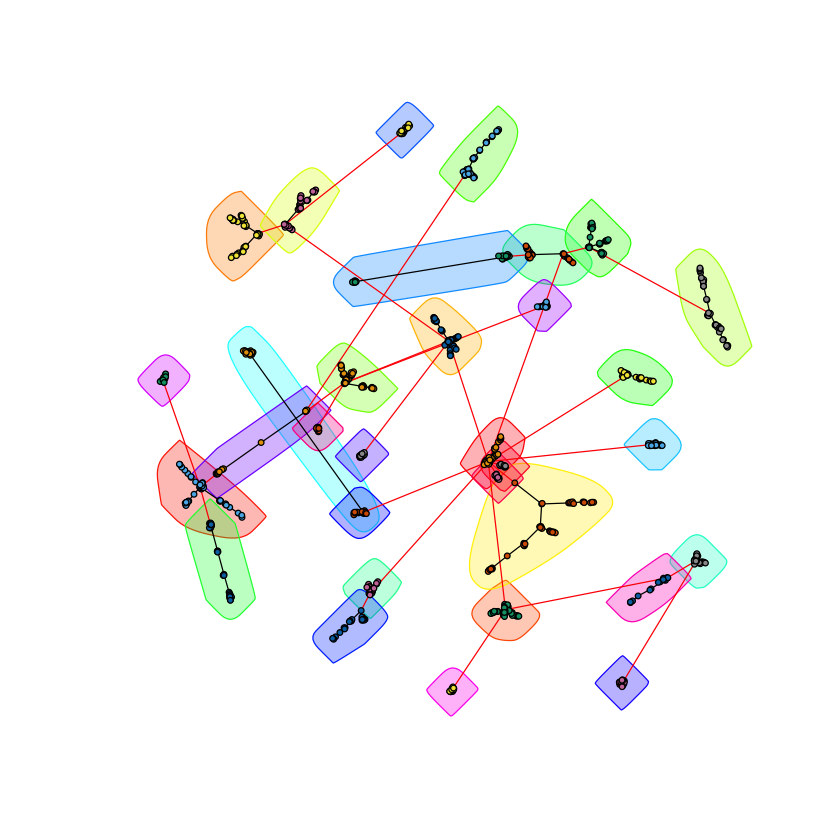

In [23]:
# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)

#### (c)


Is the graph connected:  TRUE 
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
163 138 139 140 146 172 177 139 160 152 143 134 134 146 137 132 189 132 129 138 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
182 166 124 156 124 120 123 117 140 117 112 113 119 121 125 134 111 111 110 101 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
100 117 100  97 119  96  94 132  93  89  97 101  94  93  86  83  88  84  84  87 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 76  78  77  88  74  75  74  73  74  82  73  69  73  70  67  83  65  61  60  63 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 60  58  57  64  55  54  58  53  53  62  50  52  49  50  53  46  50  42  44  36 
101 102 103 
 38  33  28 

Modularity is  0.97855750671578

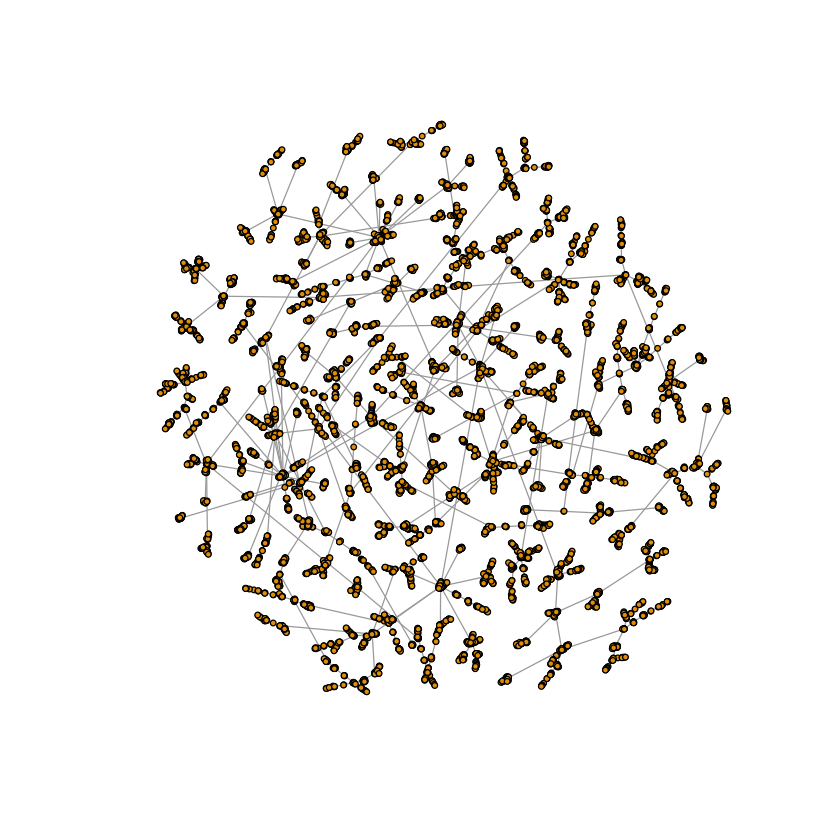

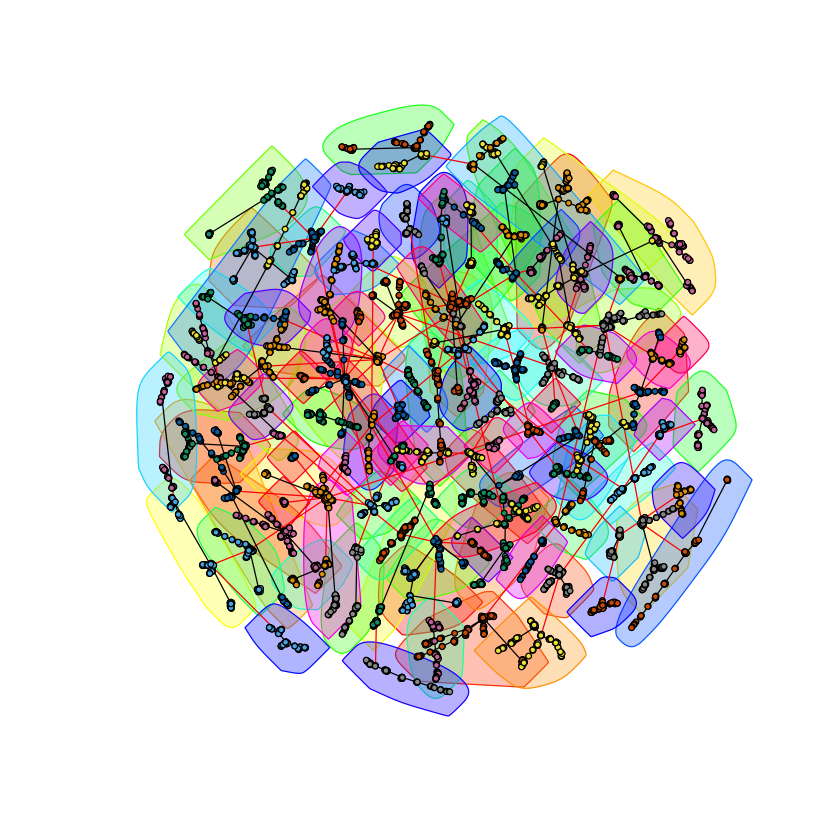

In [24]:
# Generate networks using preferential attachment model
n = 10000
m = 1
g =  barabasi.game(n=n, m=m, directed=FALSE)
cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected, "\n"))
plot(g,vertex.size=2, vertex.label=NA)

# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)

#### (d)


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -8.789       -2.312  


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -7.879       -2.980  



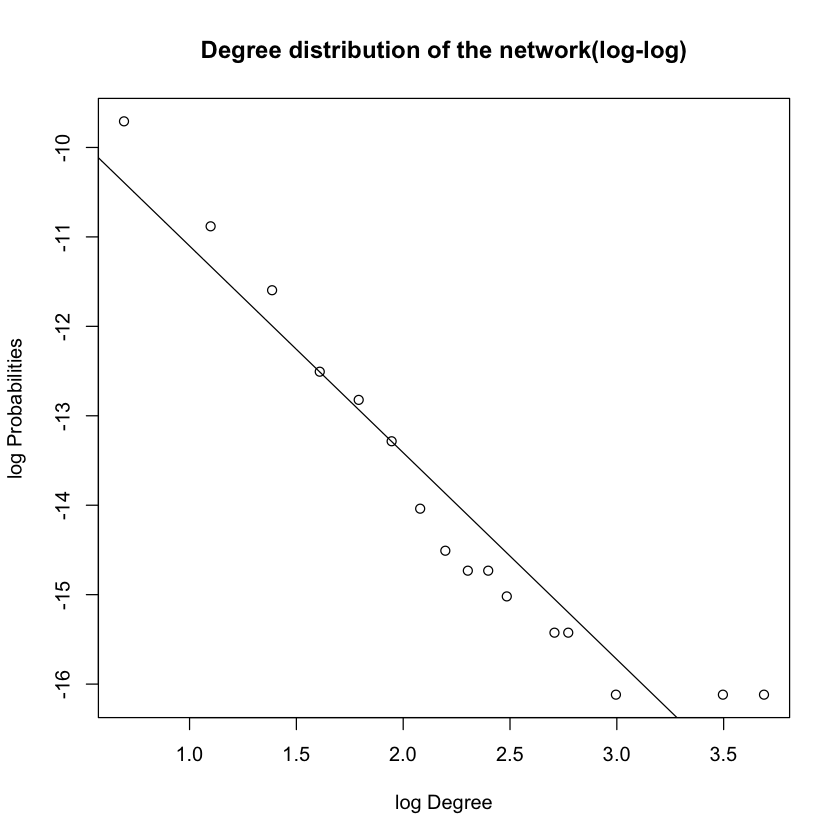

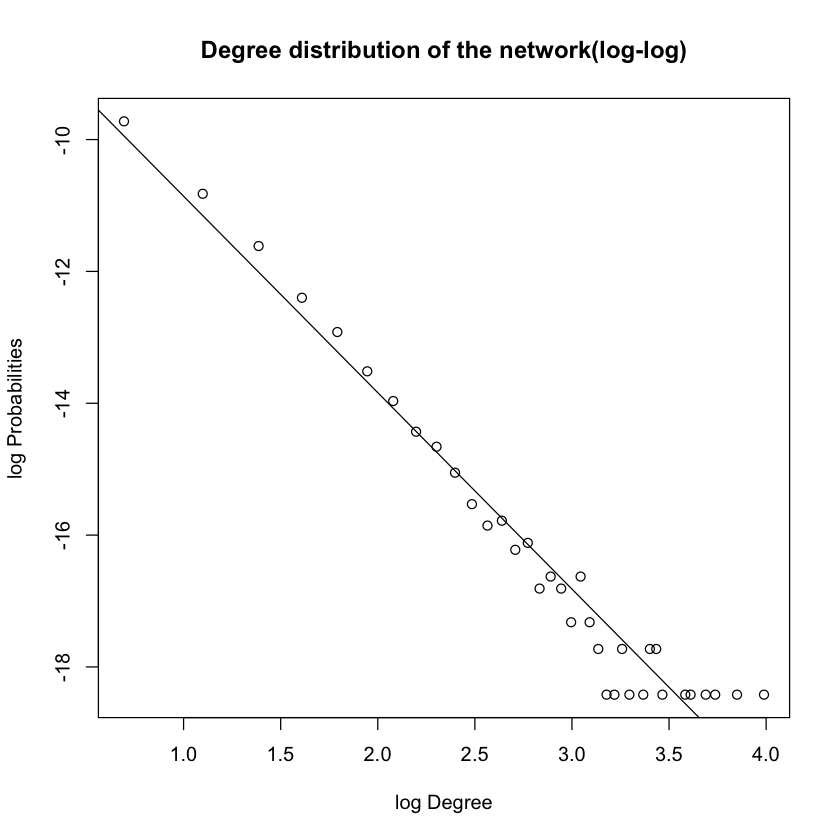

In [59]:
ns = c(1000, 10000)
m = 1


for (n in ns)
{
    degrees.sum = vector(mode = "numeric", length = 100)

    for (i in 10000){
        g = barabasi.game(n=n, m=m, directed=FALSE)
        degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)
  
    }
  
    idx = which(degrees.sum != 0, arr.ind=TRUE)
    log_degree = log(seq(1:1000))[idx]
    log_distribution = log(degrees.sum/10000)[idx]
    
    # define the relation
    relation = lm(log_distribution ~ log_degree)
    print(relation)

    plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")
}

#### (e)


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.5953      -1.4832  



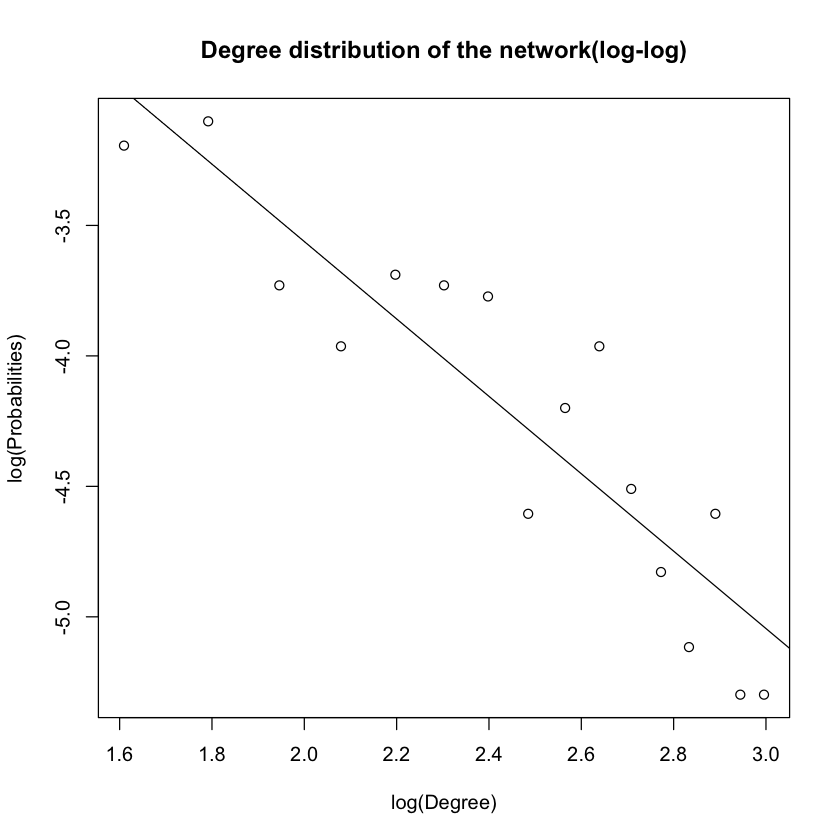

In [141]:
n = 10000
m = 1
graph_num = 1
degrees.sum = vector(mode = "numeric", length = 100)
for (i in graph_num){
    # random graph_num graph
    g = barabasi.game(n=n, m=m, directed=FALSE)
    
    # random 1000 picks for each graph
    j.deg = vector(mode = "numeric", length = 100)

    for (i in seq(1, 1000)) {

        #get its neighbor in fat tail network
        neighbor_list = neighbors(g, sample(1:1000, 1))

        # choose a neighber
        if (length(neighbor_list) ==1) {
            j = neighbor_list[1]
        }else{
            j = sample(neighbor_list, 1)
        }

        j.deg[degree(g,j)] = j.deg[degree(g,j)]+1
        

    }
    j.deg = j.deg/sum(j.deg)
    
    degrees.sum= degrees.sum + j.deg
    
}

idx = which(degrees.sum != 0, arr.ind=TRUE)
log_degree = log(seq(1:1000))[idx]
log_distribution = log(degrees.sum/graph_num)[idx]


# define the relation
relation = lm(log_distribution ~ log_degree)
print(relation)
plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log(Degree)", ylab="log(Probabilities)")

#### (f)

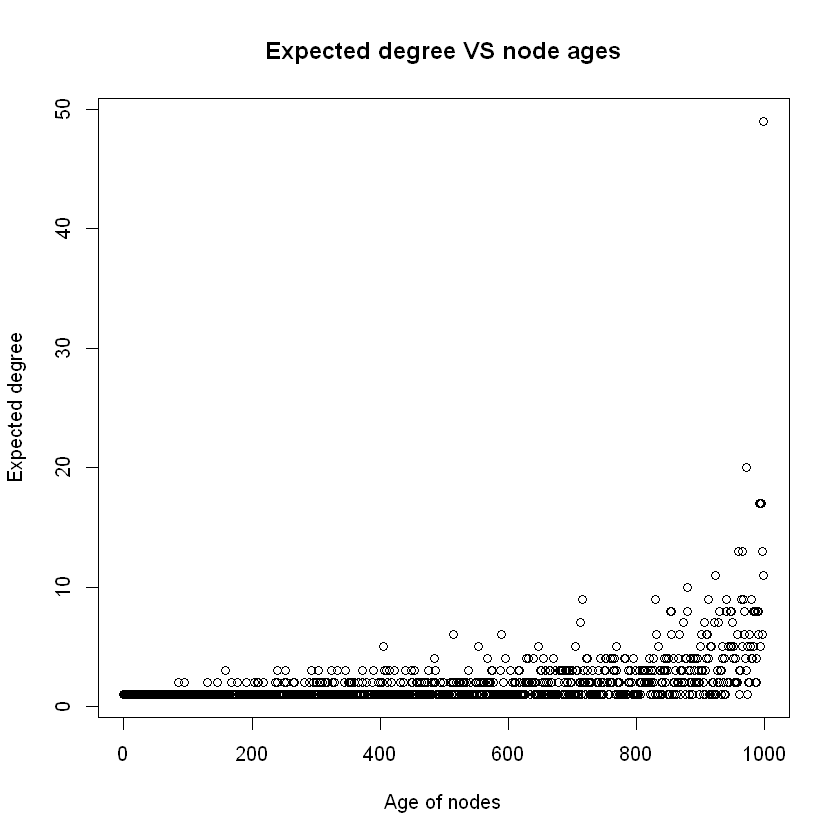

In [71]:
n = 1000
m = 1
g = barabasi.game(n=n, m=m, directed=FALSE)
iteration_times = 1000
avg_degree_all_nodes = numeric(n)
for (i in seq(1:iteration_times)) # Reapeat multiple times
{
    for (j in 1:n)
    {
        avg_degree_all_nodes[j] = avg_degree_all_nodes[j] + degree(g, j)
    }
}
avg_degree_all_nodes = avg_degree_all_nodes / iteration_times # Average the degrees
node_ages = n - seq(1:n)
plot(node_ages, avg_degree_all_nodes, main="Expected degree VS node ages", xlab="Age of nodes", ylab="Expected degree")

#### (g)


Is the graph connected:  TRUECommunity sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 63  30  29  31  28  40  86  31  38  67  96  20  84  49  56  12  62  63 115 

Modularity is  0.522030040554068
Is the graph connected:  TRUE 


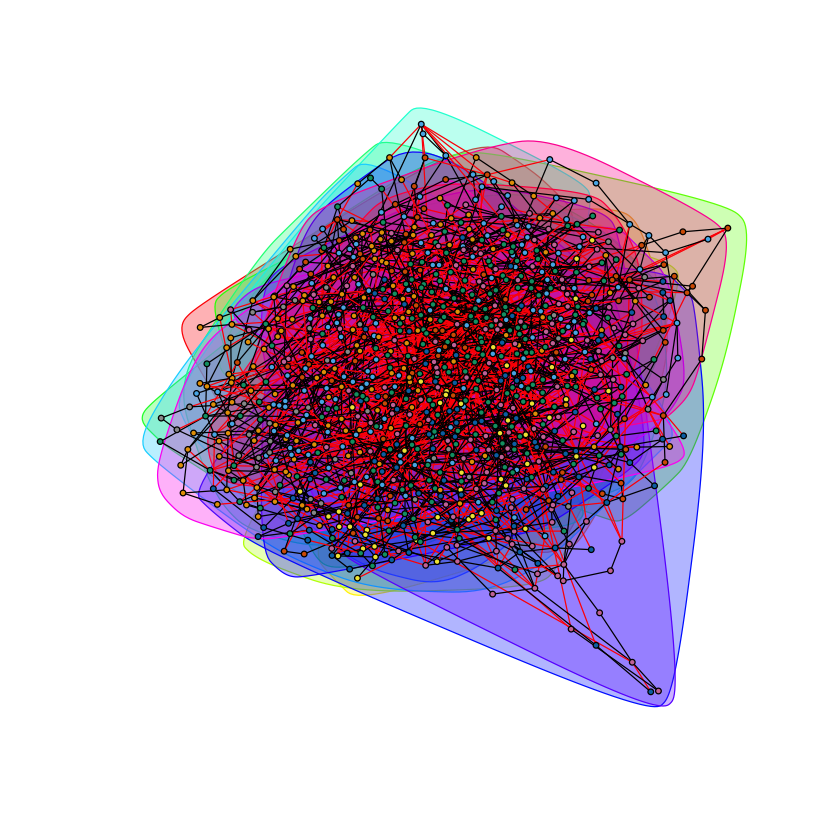

Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
123 107 121 261  89 189 278 177  85 251 150 173 119 127 164 109 828  95  48 729 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34 
140 174 161 305 183 275 313 607 407 404 578 684 637 909 

Modularity is  0.530928787940493

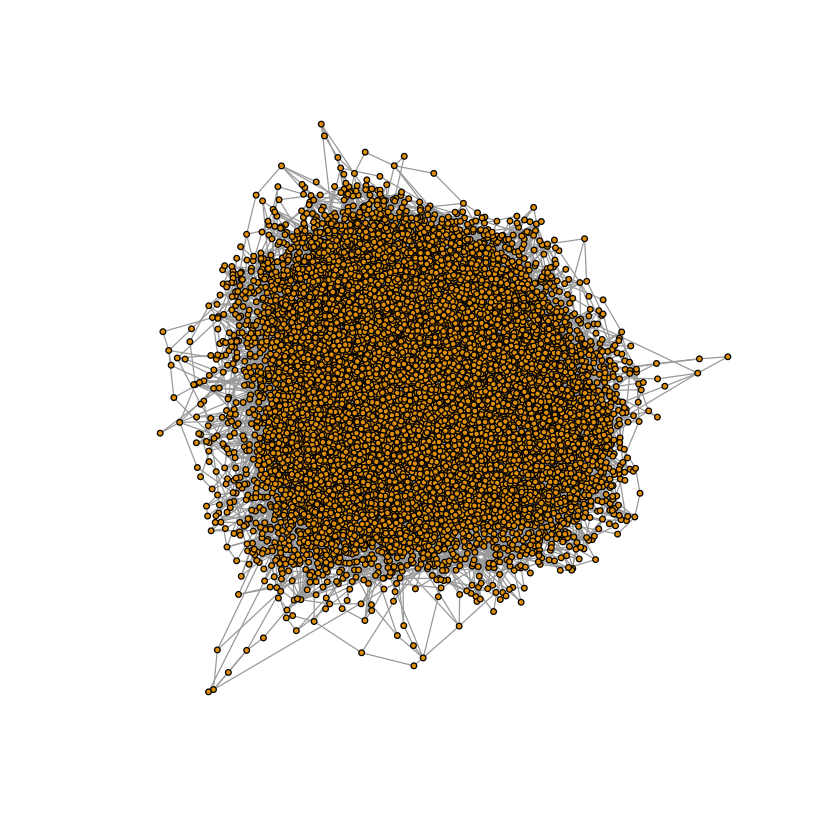


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -8.292       -2.261  



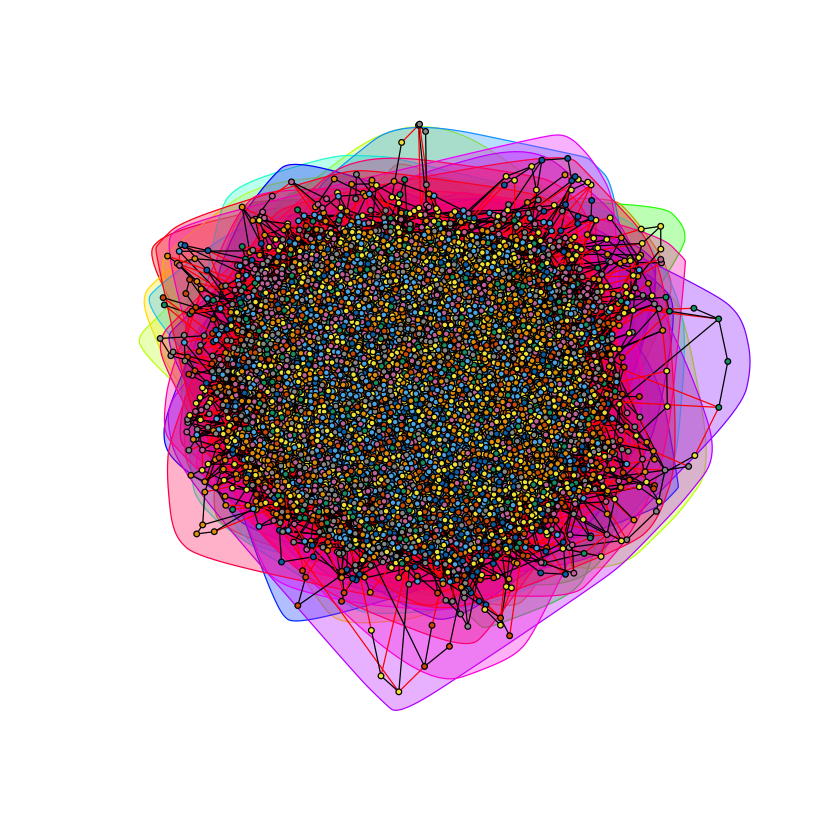


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -7.415       -2.740  



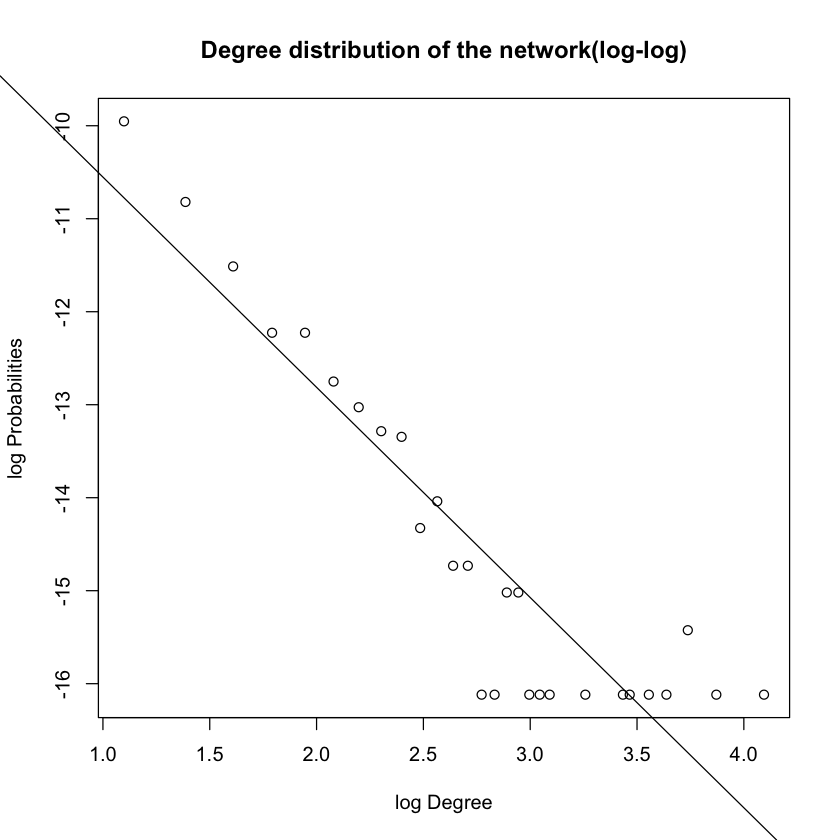


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -9.892       -1.401  



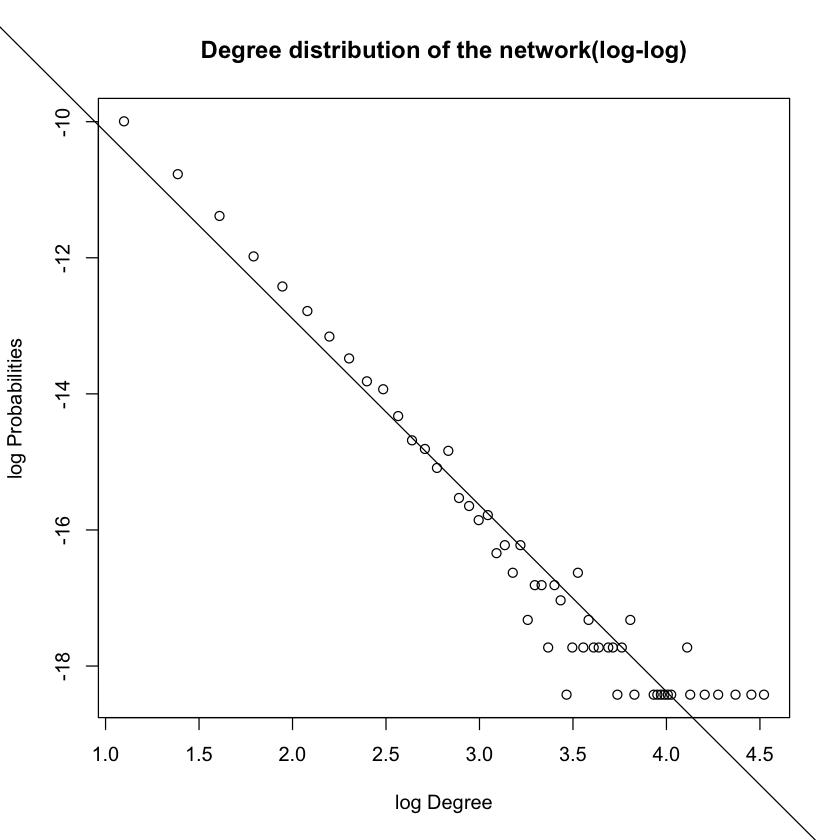

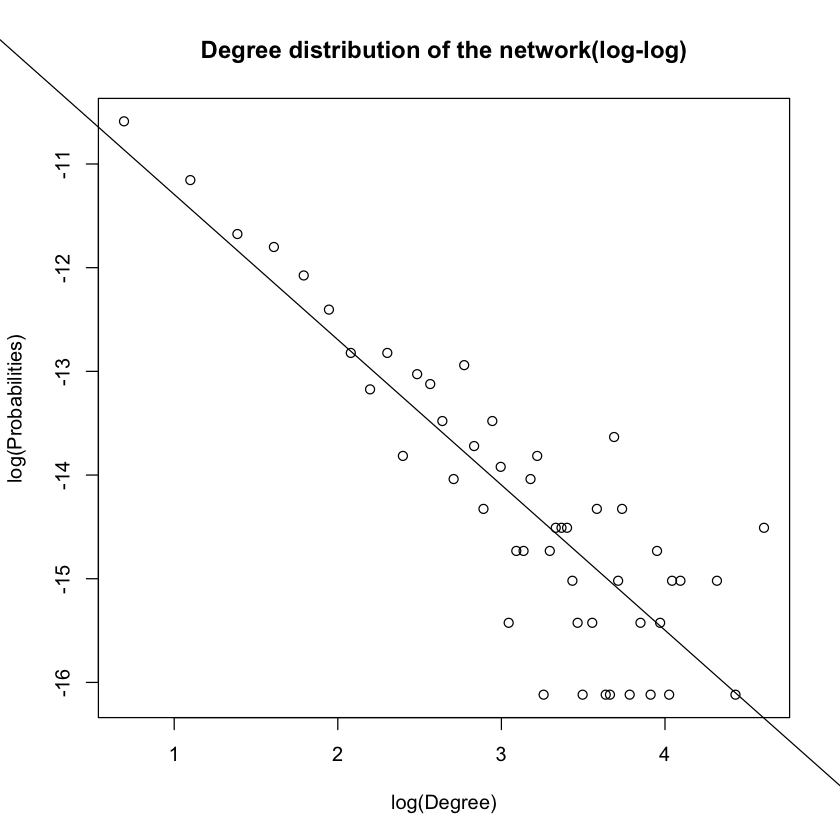

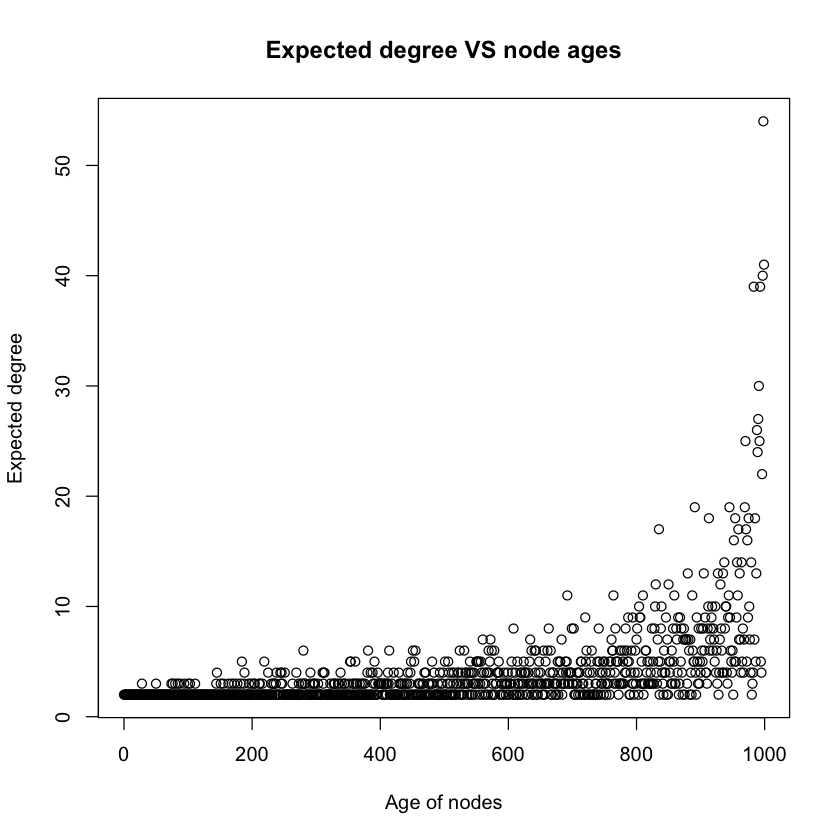

In [64]:
# Repeat previous parts with m = 2

# aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
# Generate networks using preferential attachment model
n = 1000
m = 2
g =  barabasi.game(n=n, m=m, directed=FALSE)
cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))
# plot(g,vertex.size=2, vertex.label=NA)


# bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb
# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)


# ccccccccccccccccccccccccccccccccccccccccccc
# Generate networks using preferential attachment model
n = 10000

g =  barabasi.game(n=n, m=m, directed=FALSE)
cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected, "\n"))
plot(g,vertex.size=2, vertex.label=NA)

# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)

#dddddddddddddddddddddddddddddddddddddddddddddd
ns = c(1000, 10000)



for (n in ns)
{
    degrees.sum = vector(mode = "numeric", length = 100)

    for (i in 10000){
        g = barabasi.game(n=n, m=m, directed=FALSE)
        degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)
  
    }
  
    idx = which(degrees.sum != 0, arr.ind=TRUE)
    log_degree = log(seq(1:1000))[idx]
    log_distribution = log(degrees.sum/10000)[idx]
    
    # define the relation
    relation = lm(log_distribution ~ log_degree)
    print(relation)

    plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")
}

#eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
n = 10000

graph_num = 10000
degrees.sum = vector(mode = "numeric", length = 100)
for (i in graph_num){
    # random graph_num graph
    g = barabasi.game(n=n, m=m, directed=FALSE)
    
    # random 1000 picks for each graph
    j.deg = vector(mode = "numeric", length = 200)

    for (i in seq(1, 1000)) {

        #get its neighbor in fat tail network
        neighbor_list = neighbors(g, sample(1:1000, 1))

        # choose a neighber
        if (length(neighbor_list) ==1) {
            j = neighbor_list[1]
        }else{
            j = sample(neighbor_list, 1)
        }

        j.deg[degree(g,j)] = j.deg[degree(g,j)]+1
        

    }
    j.deg = j.deg/sum(j.deg)
    
    degrees.sum[1:length(j.deg)]= degrees.sum[1:length(j.deg)] + j.deg
    
}

idx = which(degrees.sum != 0, arr.ind=TRUE)
log_degree = log(seq(1:1000))[idx]
log_distribution = log(degrees.sum/graph_num)[idx]

# define the relation
relation = lm(log_distribution ~ log_degree)
print(relation)
plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log(Degree)", ylab="log(Probabilities)")


#ffffffffffffffffffffffffffffffffffffffffffffff
n = 1000

g = barabasi.game(n=n, m=m, directed=FALSE)
iteration_times = 1000
avg_degree_all_nodes = numeric(n)
for (i in seq(1:iteration_times)) # Reapeat multiple times
{
    for (j in 1:n)
    {
        avg_degree_all_nodes[j] = avg_degree_all_nodes[j] + degree(g, j)
    }
}
avg_degree_all_nodes = avg_degree_all_nodes / iteration_times # Average the degrees
node_ages = n - seq(1:n)
plot(node_ages, avg_degree_all_nodes, main="Expected degree VS node ages", xlab="Age of nodes", ylab="Expected degree")


Is the graph connected:  TRUECommunity sizes
  1   2   3   4   5   6   7   8   9 
 50 188 160 185 119  17  65  55 161 

Modularity is  0.275498753029399
Is the graph connected:  TRUE 


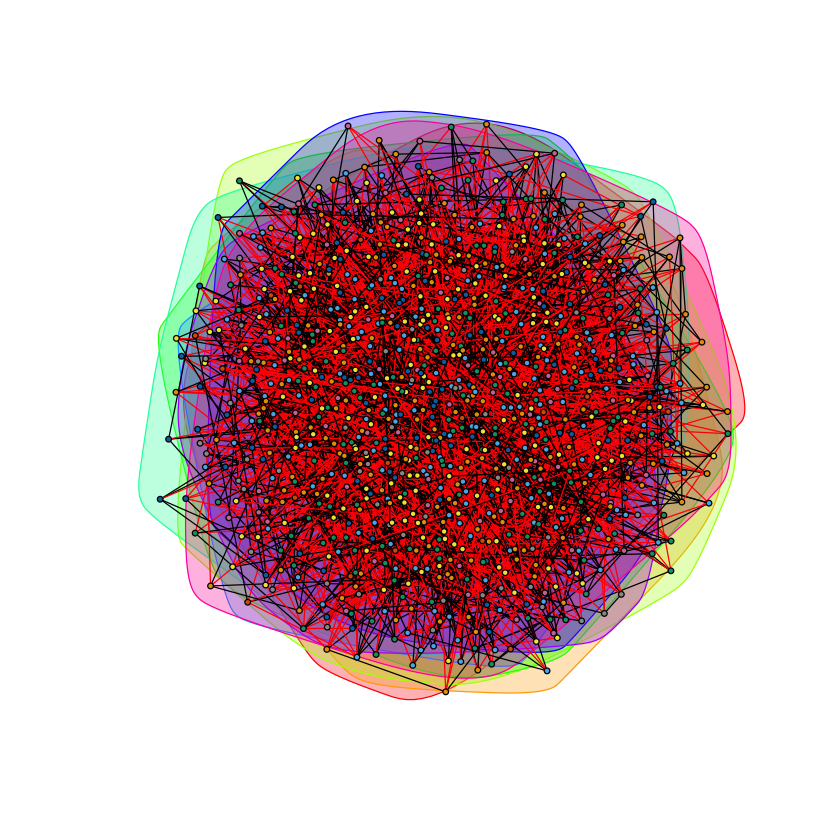

Community sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 381   75 1891   64   79  171 1622  233  356   36  292  963 1859    7 1971 

Modularity is  0.270160243631759

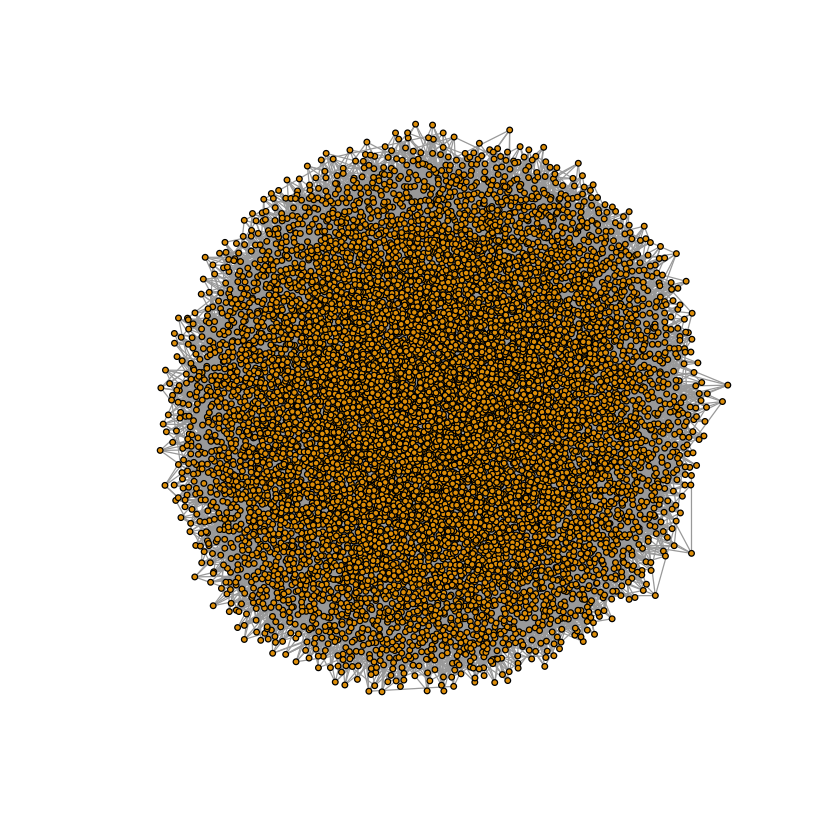


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -7.463       -2.156  



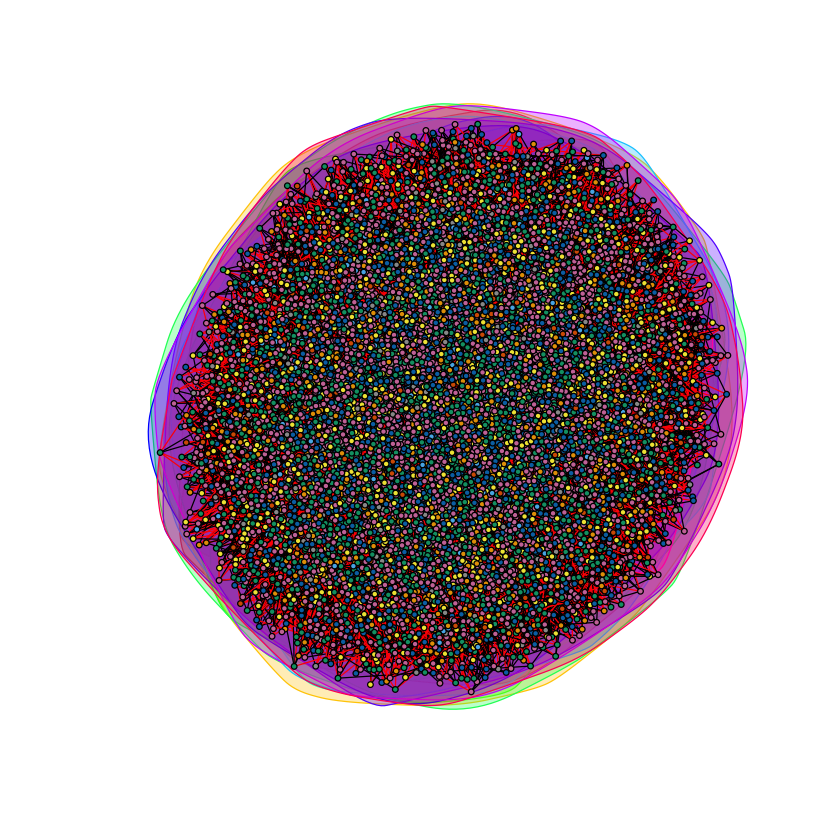


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -5.171       -2.979  



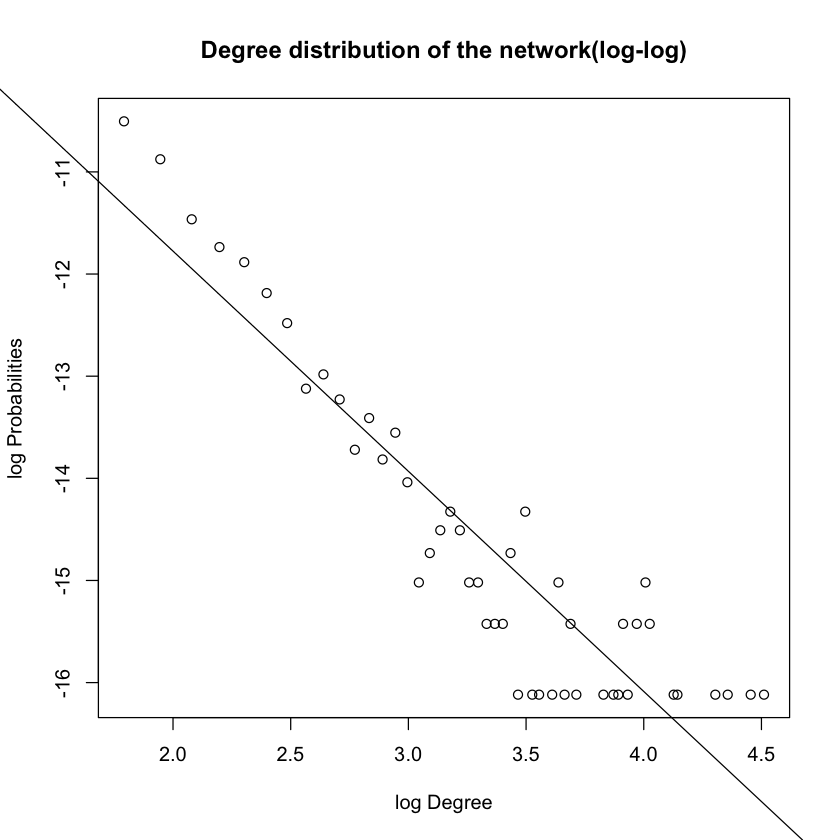

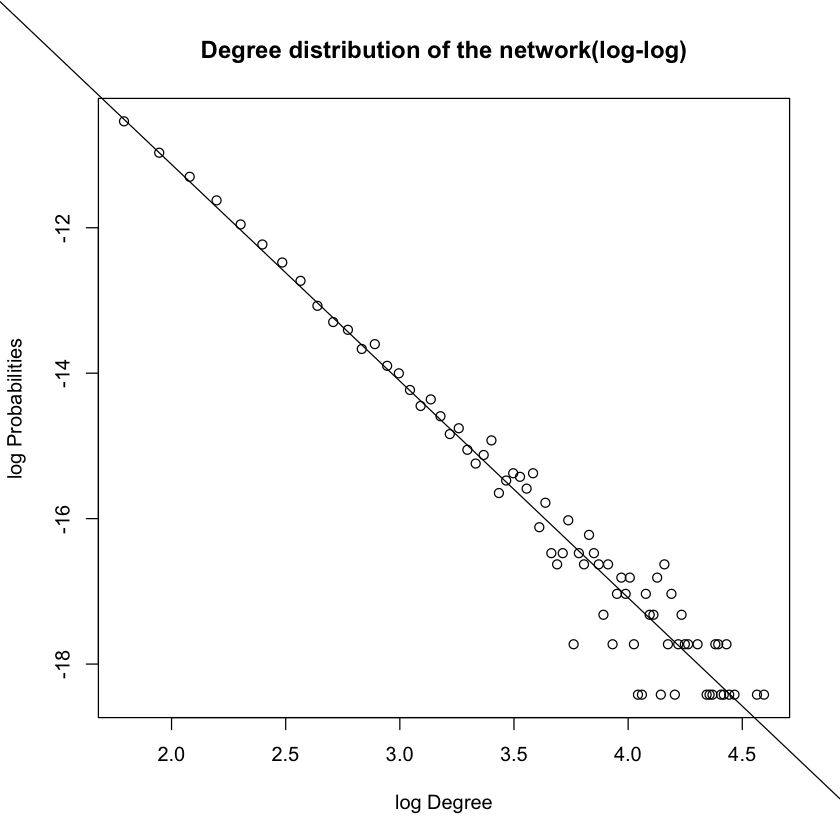

In [79]:
# Repeat previous parts with m = 5

# aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
# Generate networks using preferential attachment model
n = 1000
m = 5
g =  barabasi.game(n=n, m=m, directed=FALSE)
cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))
# plot(g,vertex.size=2, vertex.label=NA)


# bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb
# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)


# ccccccccccccccccccccccccccccccccccccccccccc
# Generate networks using preferential attachment model
n = 10000

g =  barabasi.game(n=n, m=m, directed=FALSE)
cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected, "\n"))
plot(g,vertex.size=2, vertex.label=NA)

# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)

#dddddddddddddddddddddddddddddddddddddddddddddd
ns = c(1000, 10000)

for (n in ns)
{
    degrees.sum = vector(mode = "numeric", length = 100)

    for (i in 10000){
        g = barabasi.game(n=n, m=m, directed=FALSE)
        degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)
  
    }
  
    idx = which(degrees.sum > 0, arr.ind=TRUE)
    log_degree = log(seq(1:1000))[idx]
    log_distribution = log(degrees.sum/10000)[idx]
    
    # define the relation
    relation = lm(log_distribution ~ log_degree)
    print(relation)

    plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")
}




Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -9.129       -1.502  



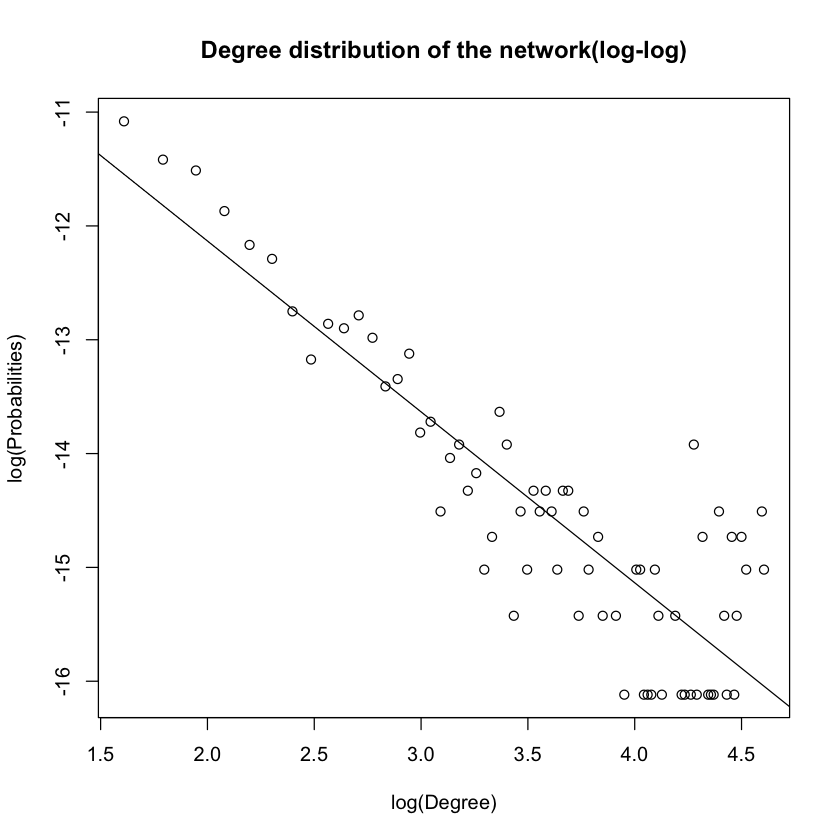

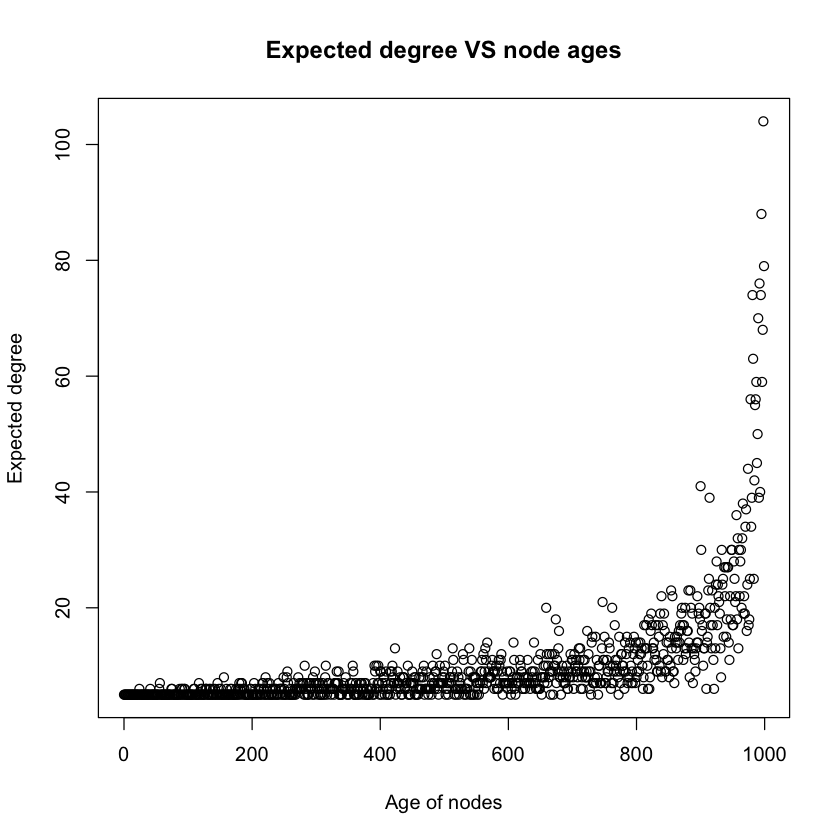

In [82]:
#eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee


n = 10000
m = 5
graph_num = 10000
degrees.sum = vector(mode = "numeric", length = 2000)
for (i in graph_num){
    # random graph_num graph
    g = barabasi.game(n=n, m=m, directed=FALSE)
    
    # random 1000 picks for each graph
    j.deg = vector(mode = "numeric", length = 2000)

    for (i in seq(1, 1000)) {

        #get its neighbor in fat tail network
        neighbor_list = neighbors(g, sample(1:1000, 1))

        # choose a neighber
        if (length(neighbor_list) ==1) {
            j = neighbor_list[1]
        }else{
            j = sample(neighbor_list, 1)
        }

        j.deg[degree(g,j)] = j.deg[degree(g,j)]+1

    }
    j.deg = j.deg/sum(j.deg)
    degrees.sum[1:length(j.deg)]= degrees.sum[1:length(j.deg)] + j.deg
    
}

idx = which(degrees.sum > 0, arr.ind=TRUE)
log_degree = log(seq(1:1000))[idx]
log_distribution = log(degrees.sum/graph_num)[idx]

# define the relation
relation = lm(log_distribution ~ log_degree)
print(relation)
plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log(Degree)", ylab="log(Probabilities)")




#ffffffffffffffffffffffffffffffffffffffffffffff
n = 1000

g = barabasi.game(n=n, m=m, directed=FALSE)
iteration_times = 1000
avg_degree_all_nodes = numeric(n)
for (i in seq(1:iteration_times)) # Reapeat multiple times
{
    for (j in 1:n)
    {
        avg_degree_all_nodes[j] = avg_degree_all_nodes[j] + degree(g, j)
    }
}
avg_degree_all_nodes = avg_degree_all_nodes / iteration_times # Average the degrees
node_ages = n - seq(1:n)
plot(node_ages, avg_degree_all_nodes, main="Expected degree VS node ages", xlab="Age of nodes", ylab="Expected degree")

#### (h)

Origianl graph: 
Modularity is  0.932936439943449

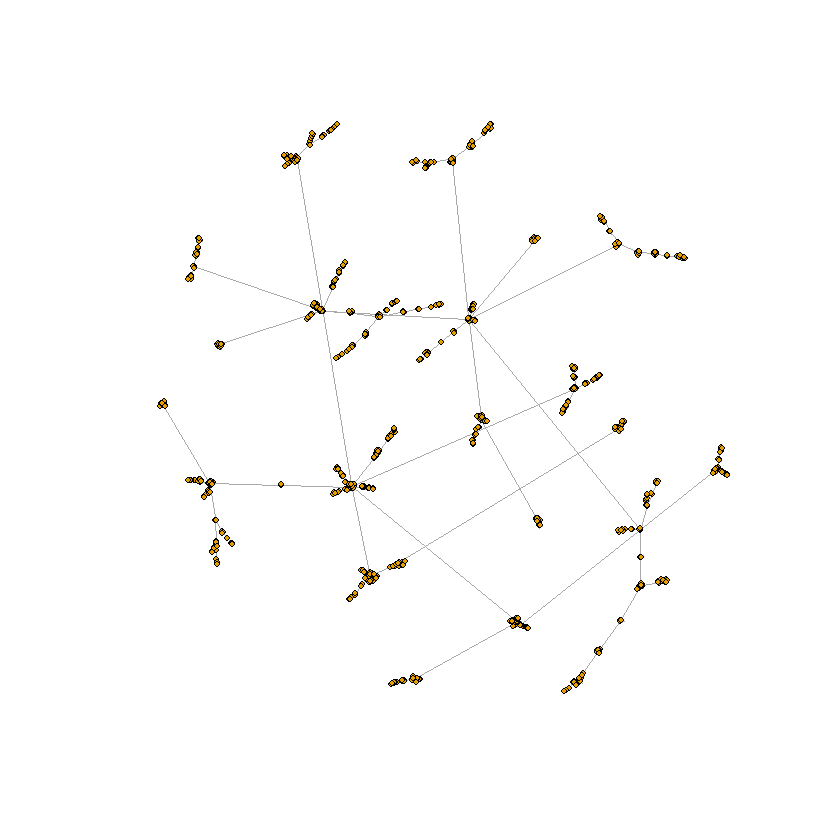

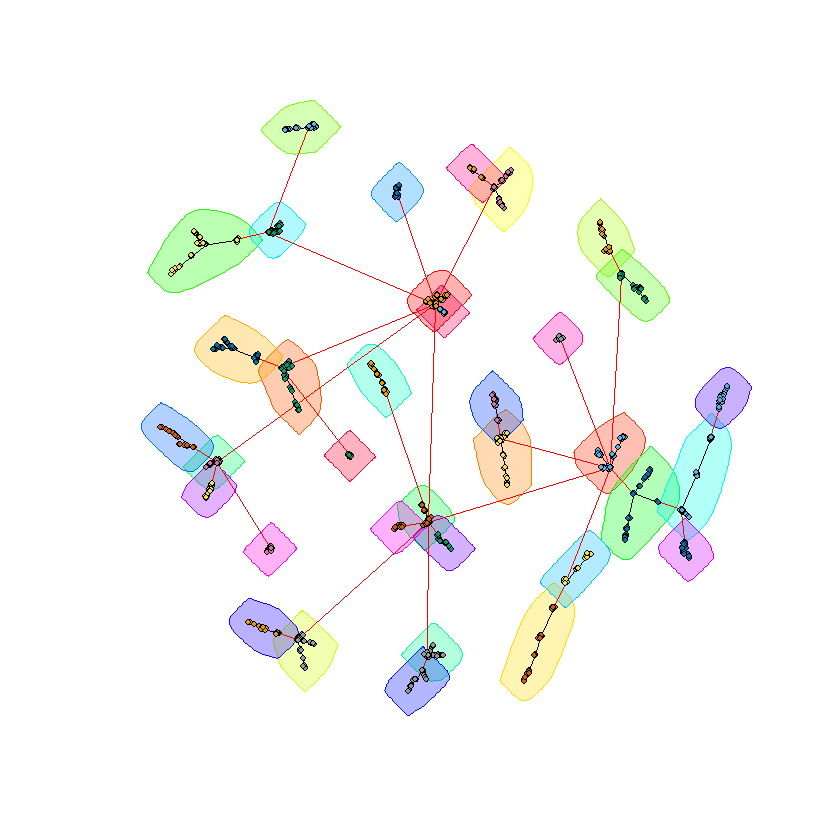

In [159]:
n = 1000
m = 1
g1 = barabasi.game(n=n, m=m, directed=FALSE)
degree_seq1 = degree(g1)

# Find the community structure
g_community = fastgreedy.community(g1)

# Find modularity
g_modularity = modularity(g_community)
cat("Origianl graph: ")
cat(paste("\nModularity is ", g_modularity))

# Plot the graph
plot(g1,vertex.size=2, vertex.label=NA)

# Plot graph with communities
plot(g_community, g1, vertex.size=2, vertex.label=NA)

New graph: 
Modularity is  0.849261173084998

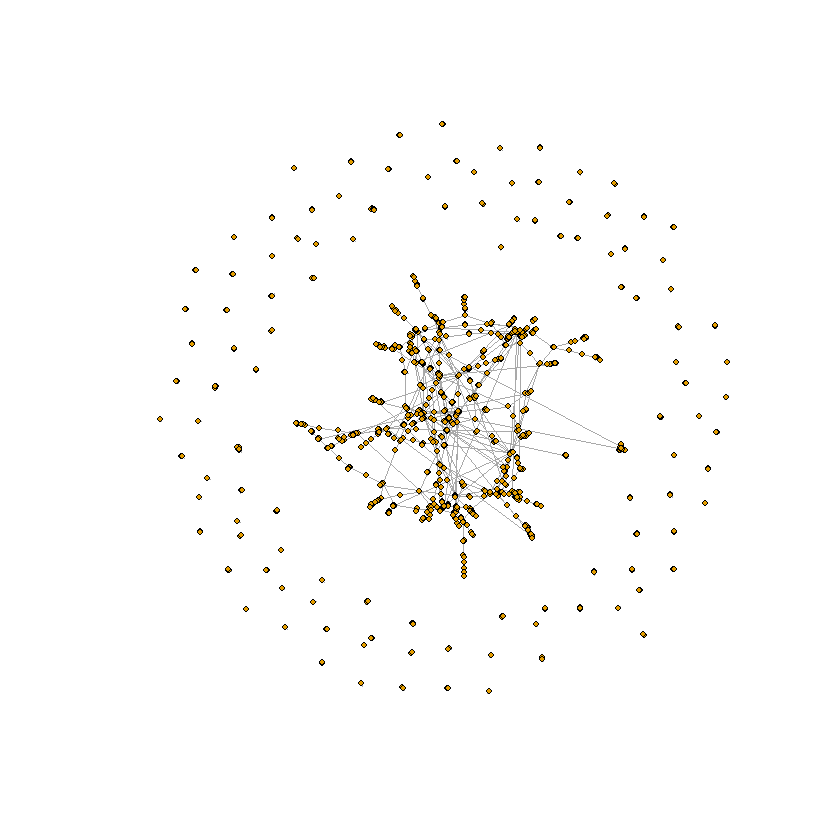

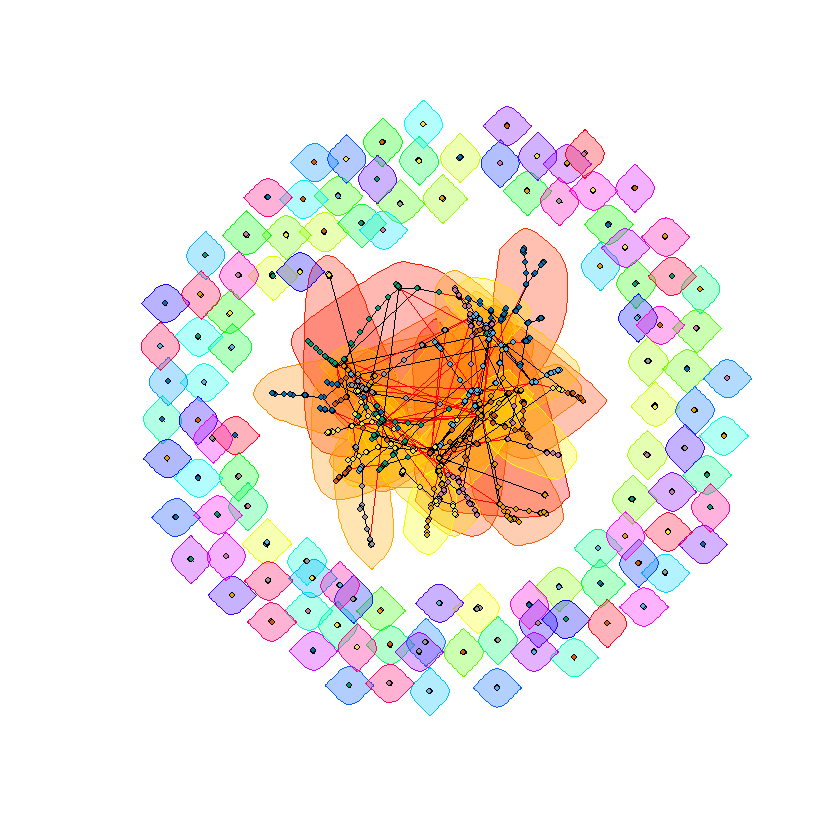

In [160]:
g2 = sample_degseq(degree_seq1, method="simple.no.multiple") # Generate graph with degree seq

# Find the community structure
g_community = fastgreedy.community(g2)

# Find modularity
g_modularity = modularity(g_community)
cat("New graph: ")
cat(paste("\nModularity is ", g_modularity))

# Plot the graph
plot(g2,vertex.size=2, vertex.label=NA)

# Plot graph with communities
plot(g_community, g2, vertex.size=2, vertex.label=NA)

#### Question 3

#### (a)


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -7.128       -3.303  



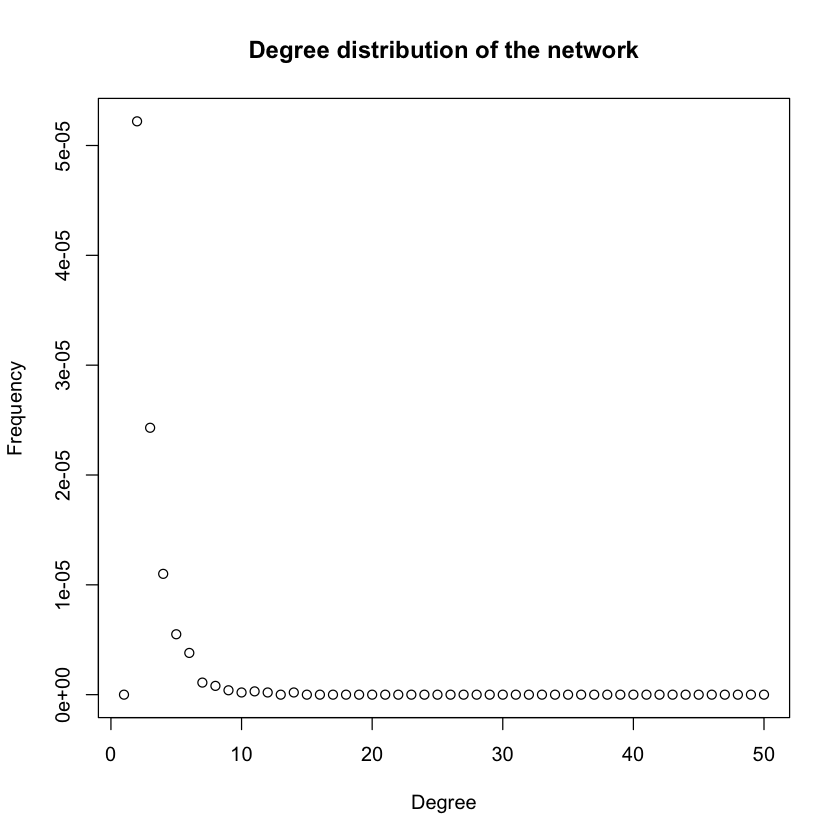

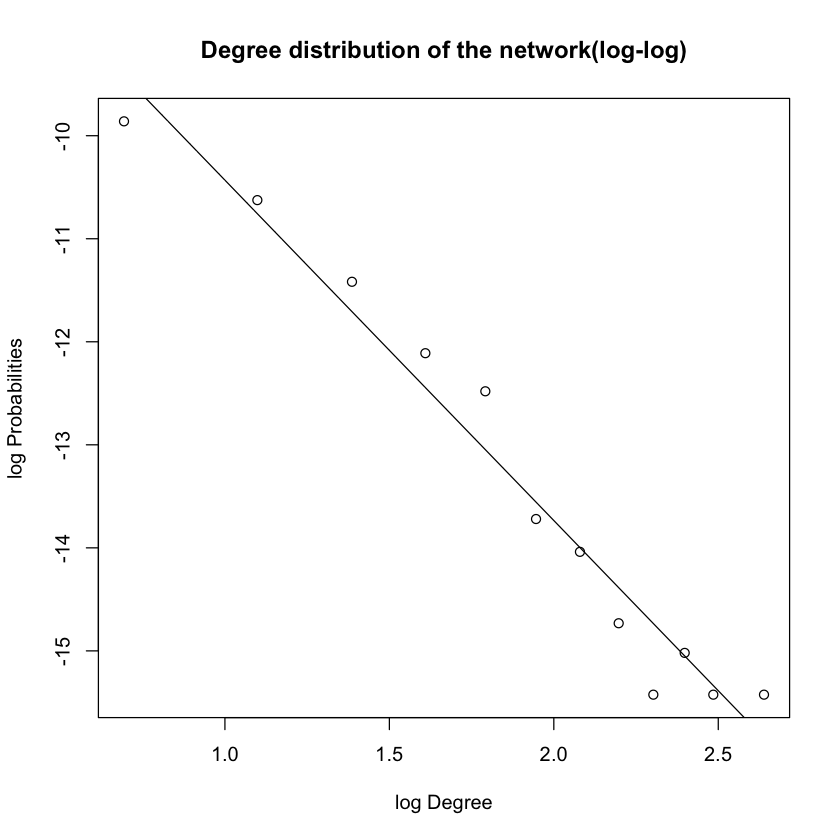

In [71]:
n = 1000
m = 1
alpha = 1
beta = -1
a = c = d = 1
b = 0
degrees.sum = vector(mode = "numeric", length = 50)

for (i in 10000){
    g = sample_pa_age(n=n, pa.exp=alpha, ,m=m, aging.exp=beta, zero.deg.appeal=a, 
                  zero.age.appeal=b, deg.coef=c, age.coef=d, aging.bin=1000, directed=FALSE)


    degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)

}

plot(seq(1:50),degrees.sum/10000,main="Degree distribution of the network",
     xlab="Degree",ylab="Frequency")


idx = which(degrees.sum != 0, arr.ind=TRUE)
log_degree = log(seq(1:50))[idx]
log_distribution = log(degrees.sum/10000)[idx]

# define the relation
relation = lm(log_distribution ~ log_degree)
print(relation)

plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")



Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -6.904       -3.452  



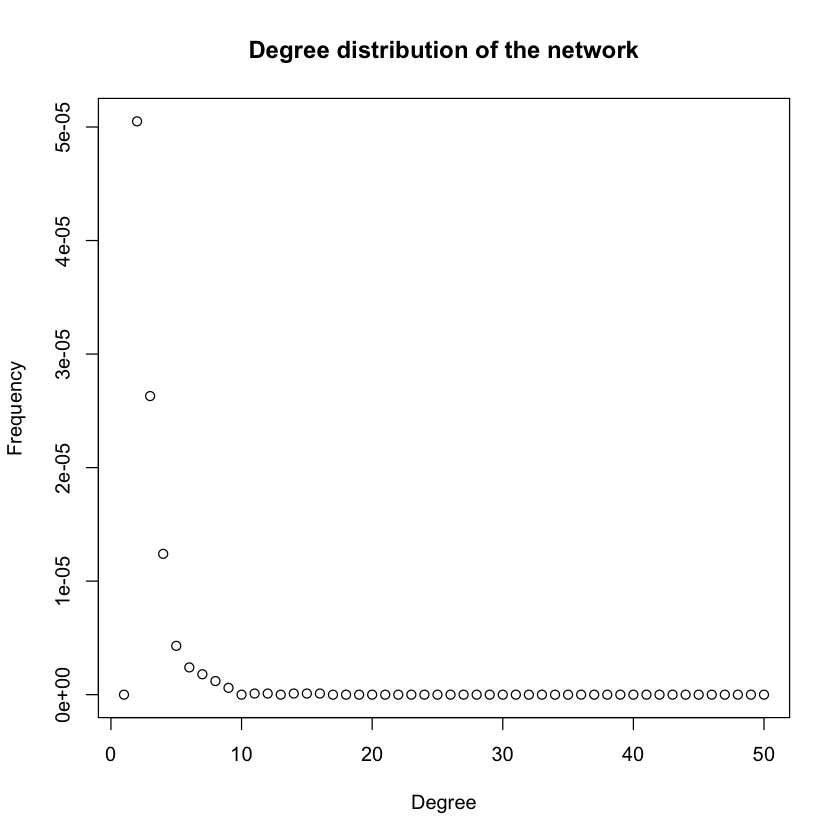


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -5.040       -4.385  



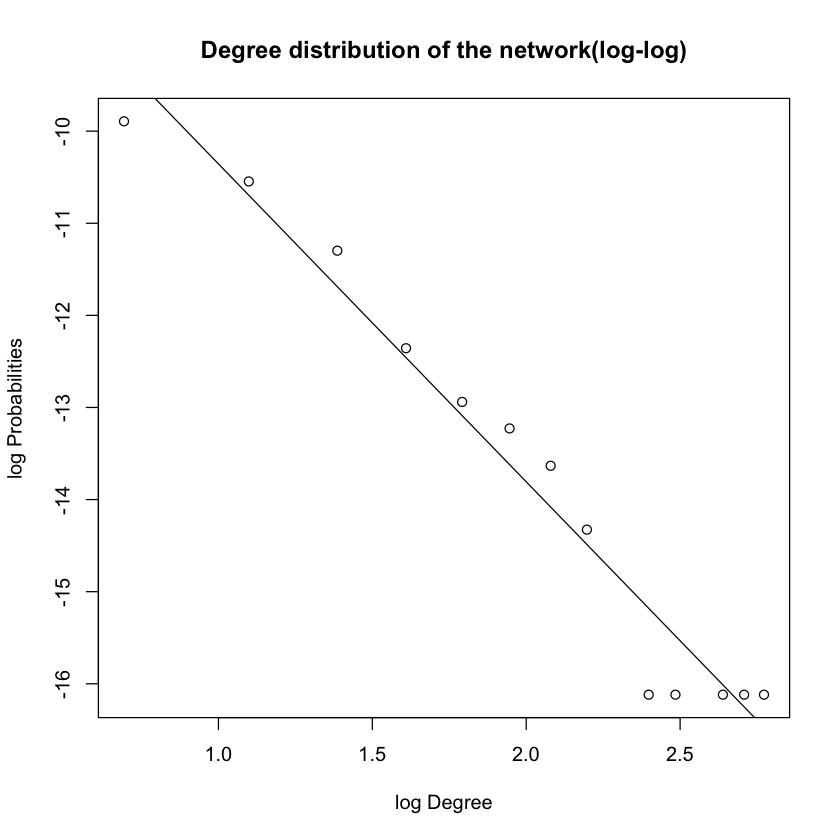

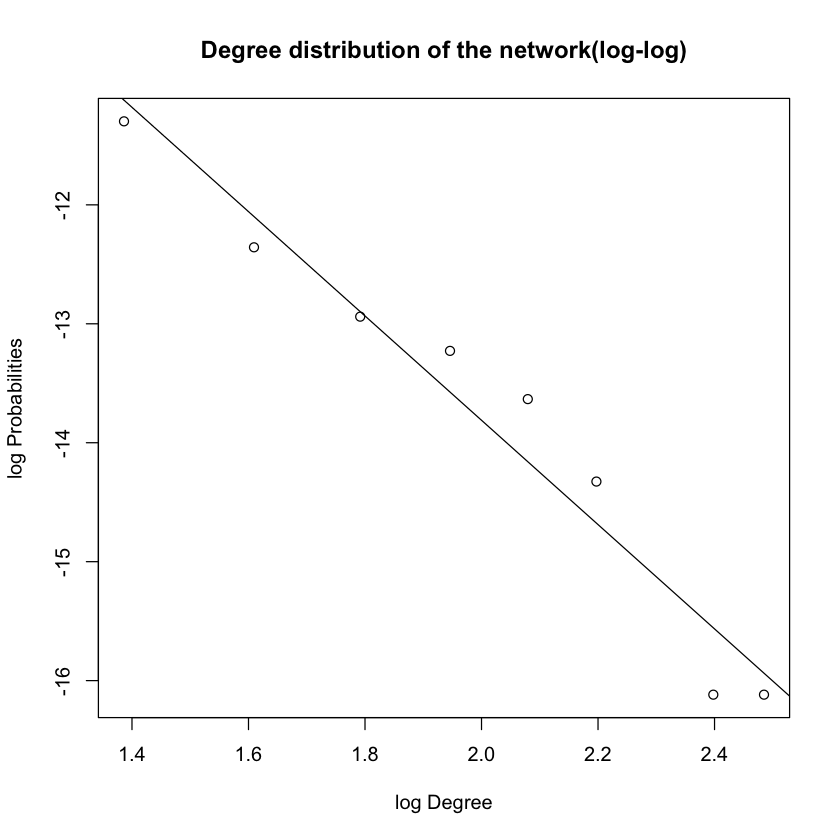

In [135]:
# TA's method
n = 1000
m = 1

degrees.sum = vector(mode = "numeric", length = 50)

for (i in 10000){
    g = aging.prefatt.game (1000, directed=F, pa.exp=1, aging.exp=-1)

    degrees.sum[1:length(degree.distribution(g))]= degrees.sum[1:length(degree.distribution(g))] + degree.distribution(g)

}

plot(seq(1:50),degrees.sum/10000,main="Degree distribution of the network",
     xlab="Degree",ylab="Frequency")




# define the relation before truncated
idx = which(degrees.sum != 0, arr.ind=TRUE)
log_degree = log(seq(1:50))[idx]
log_distribution = log(degrees.sum/10000)[idx]


relation = lm(log_distribution ~ log_degree)
print(relation)
plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")


# after truncated
log_degree = log_degree[3:10]
log_distribution = log_distribution[3:10]

relation = lm(log_distribution ~ log_degree)
print(relation)
plot(log_degree,log_distribution,abline(relation), main="Degree distribution of the network(log-log)", xlab="log Degree", ylab="log Probabilities")




#### (b)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
43 41 41 41 40 38 40 35 38 35 34 33 32 33 34 35 28 30 27 27 25 27 25 24 24 22 
27 28 29 30 31 32 33 
22 21 22 23 20 18 22 

Modularity is  0.935862789716648

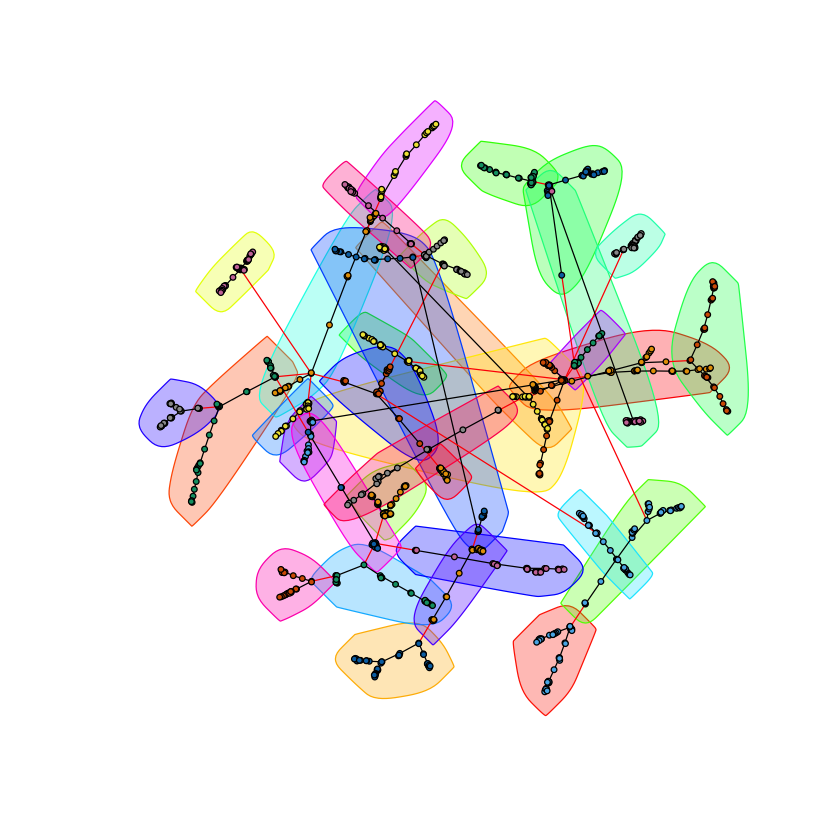

In [72]:
# Find the community structure
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\nModularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA)

## Part 2

In [96]:
# Functions
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

#### Question 1

#### (a)

In [97]:
n = 1000
p = 0.01
g = erdos.renyi.game(n, p, directed=FALSE)

# Random walk on GCC
g.components = clusters(g)
ix = which.max(g.components$csize) # Idx of the largest component
g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC

# Find diameter
cur_diameter = diameter(g.giant, directed = FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))


Diameter of GCC:  5
Is the graph connected:  TRUE

#### (b)

In [ ]:
ts = seq(1:20) # Number of steps.
iteration_times = 1000
transition_matrix = create_transition_matrix(g.giant)

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g.giant), 1)
        last_node = random_walk(g.giant, t, start_node, transition_matrix)
        cur_distance = distances(g.giant, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

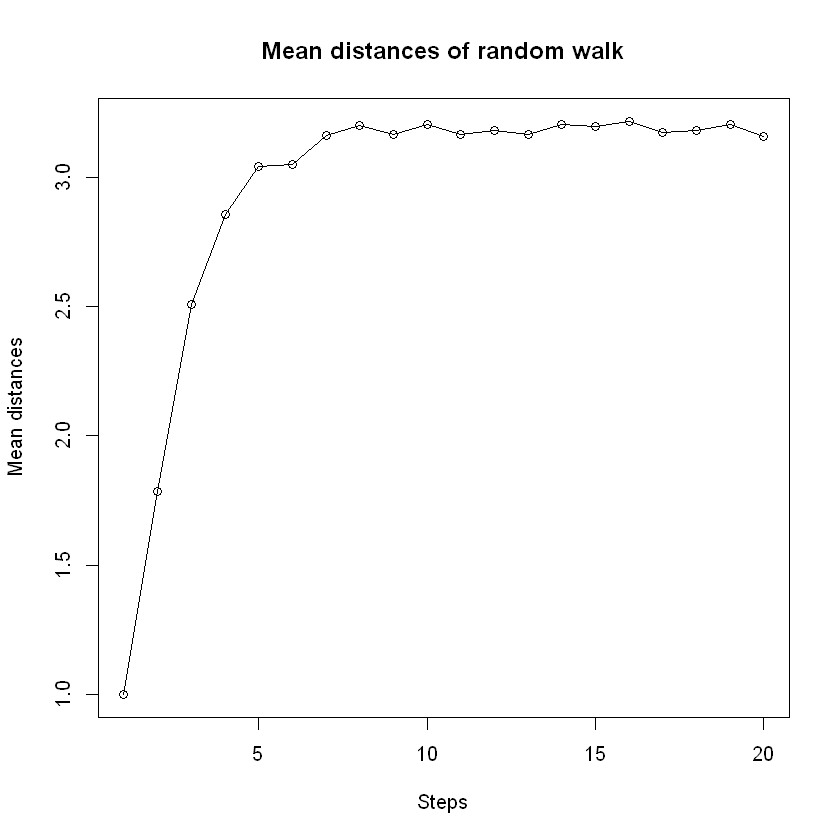

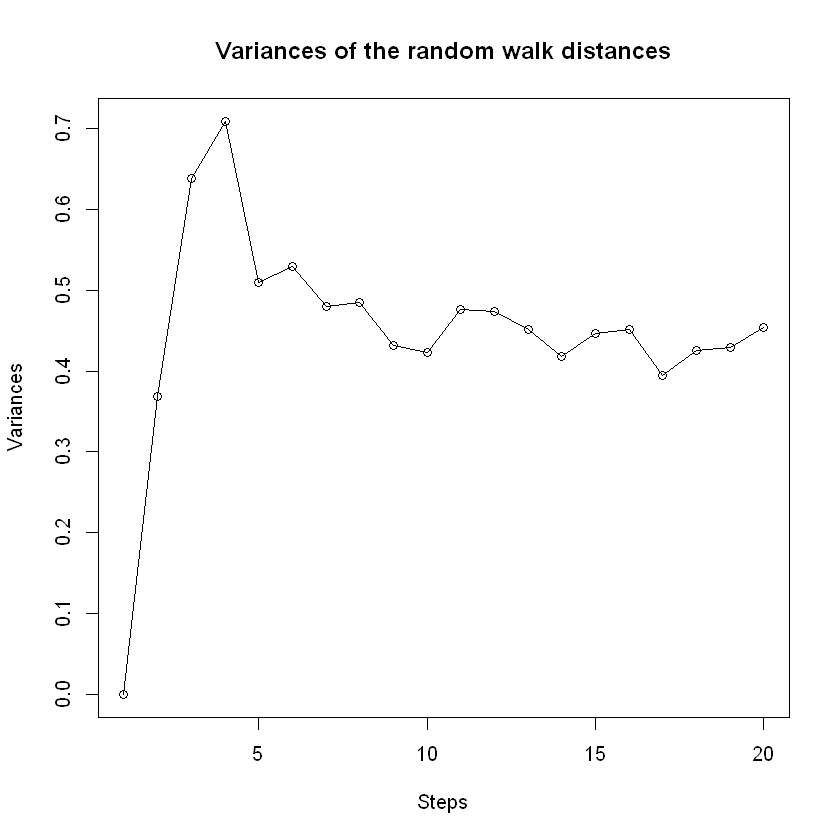

In [5]:
plot(ts, avg_distances, type="o", main="Mean distances of random walk", xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main="Variances of the random walk distances", xlab="Steps",ylab="Variances")

#### (c)

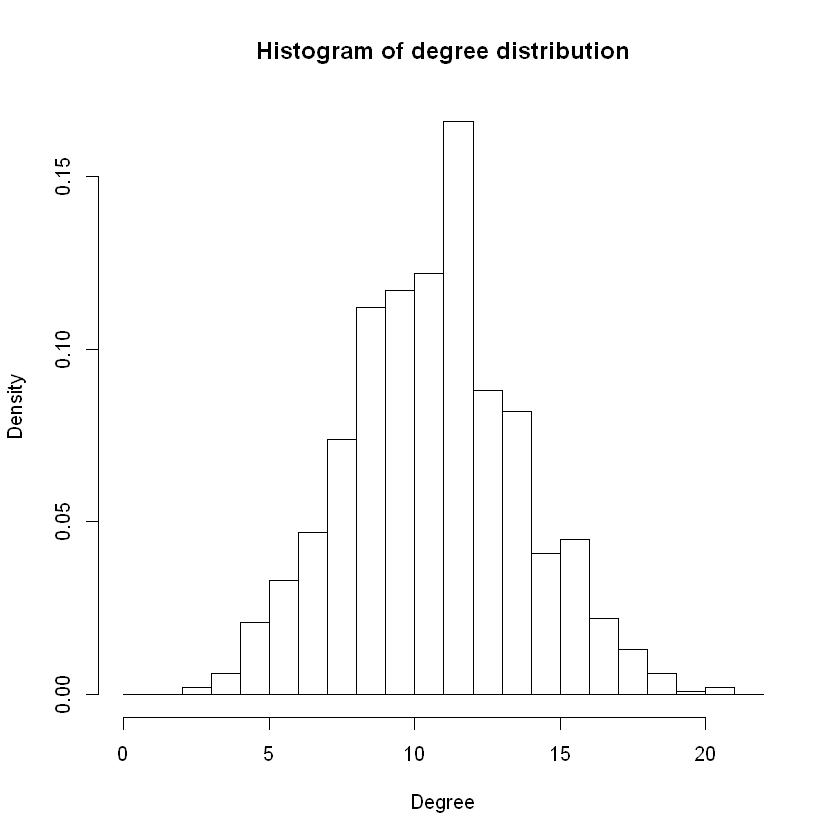

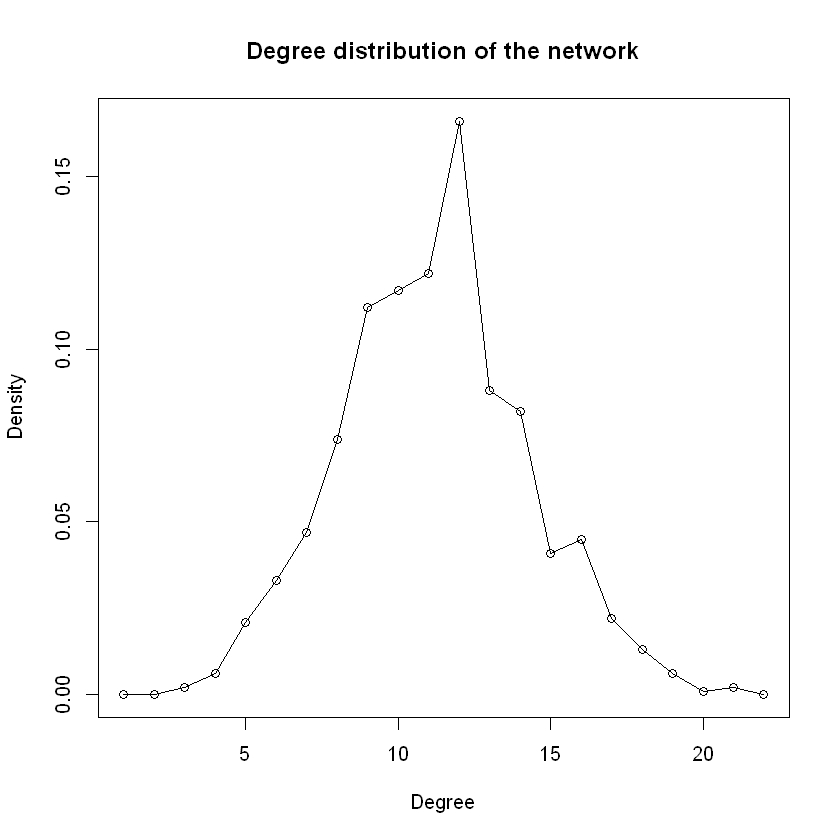

In [18]:
# Store degrees
random_walk_degrees = c()
iteration_times = 1000
t = 20 # Number of steps (Reach steady state)
transition_matrix = create_transition_matrix(g.giant)

for (i in 1:iteration_times)
{
    start_node = sample(1:vcount(g.giant), 1)
    last_node = random_walk(g.giant, t, start_node, transition_matrix)
    cur_degree = degree(g.giant, last_node)
    random_walk_degrees = c(random_walk_degrees, cur_degree)
}

h = hist(random_walk_degrees, breaks=seq(0, max(random_walk_degrees)), freq=FALSE, main ="Histogram of degree distribution", xlab="Degree")
plot_x = tail(h$breaks, length(h$breaks) - 1) # Remove 0 degree
plot_y = h$density
plot(plot_x, plot_y, main="Degree distribution of the network", xlab="Degree", ylab="Density", type="o")
#plot(plot_x, plot_y, log="xy", main="Degree distribution of the network(log-log)", xlab="Degree", ylab="Density")

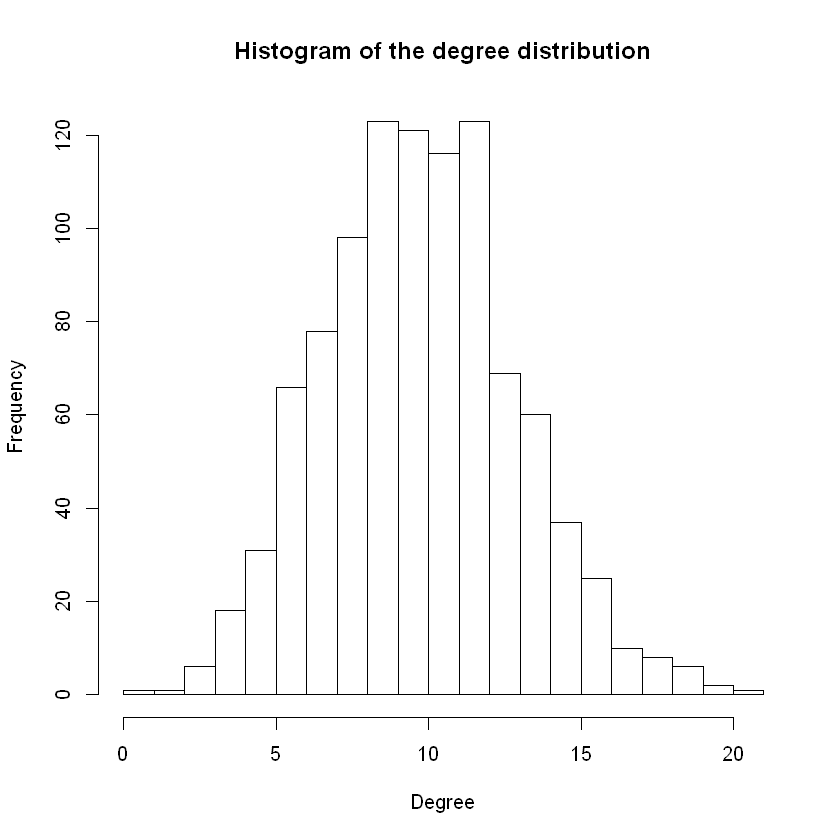

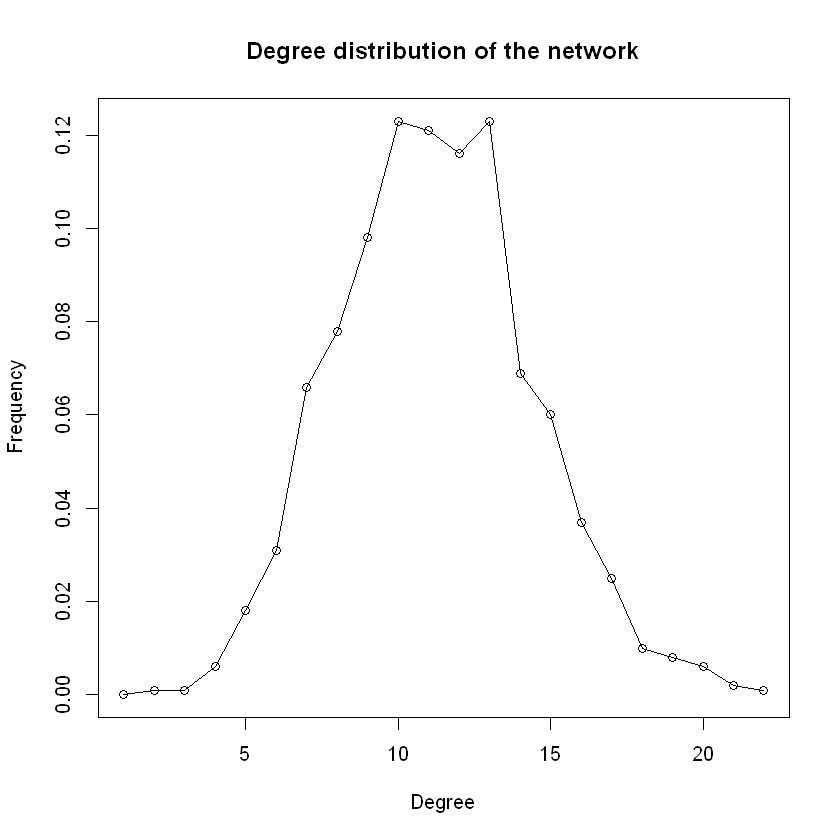

In [8]:
# Degree distribution of the graph
hist(degree(g), breaks=seq(0, max(degree(g))), main="Histogram of the degree distribution",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g), main="Degree distribution of the network",xlab="Degree",ylab="Frequency", type="o")

#### (d)


Results with n =  100
Is the graph connected:  FALSE
Diameter of GCC:  12

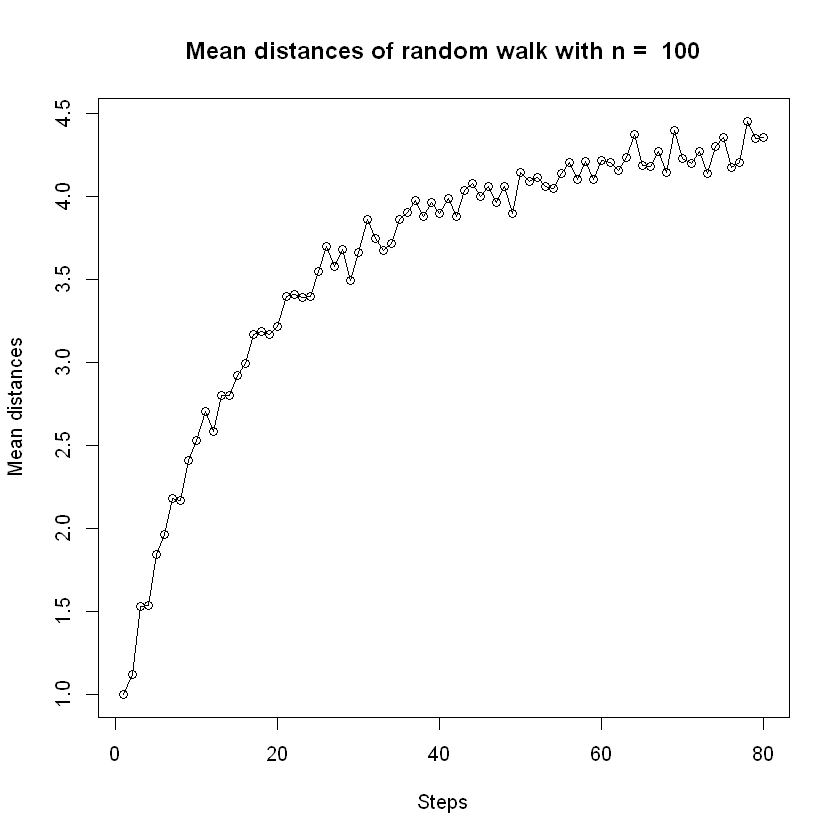

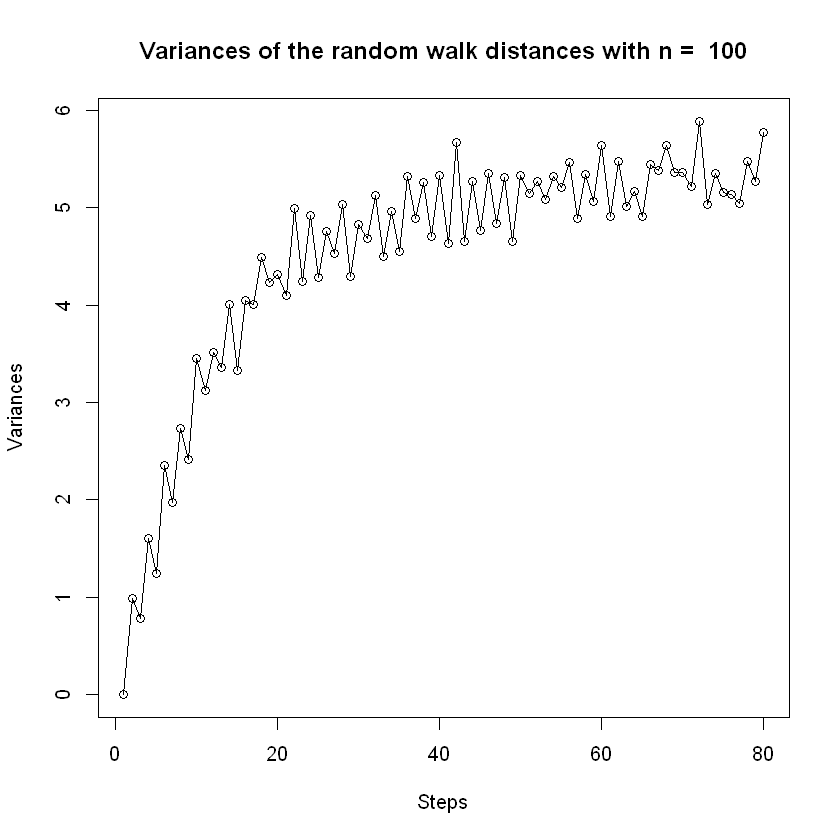

In [3]:
n = 100
cat("\nResults with n = ", n)
p = 0.01
g = erdos.renyi.game(n, p, directed=FALSE)
ts = seq(1:80) # Number of steps.
iteration_times = 1000

# Random walk on GCC
g.components = clusters(g)
ix = which.max(g.components$csize) # Idx of the largest component
g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
transition_matrix = create_transition_matrix(g.giant)

cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))

# Find diameter
cur_diameter = diameter(g.giant, directed=FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g.giant), 1)
        last_node = random_walk(g.giant, t, start_node, transition_matrix)
        cur_distance = distances(g.giant, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(ts, avg_distances, type="o", main=paste("Mean distances of random walk with n = ", n), xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main=paste("Variances of the random walk distances with n = ", n), xlab="Steps",ylab="Variances")


Results with n =  10000
Is the graph connected:  TRUE
Diameter of GCC:  3

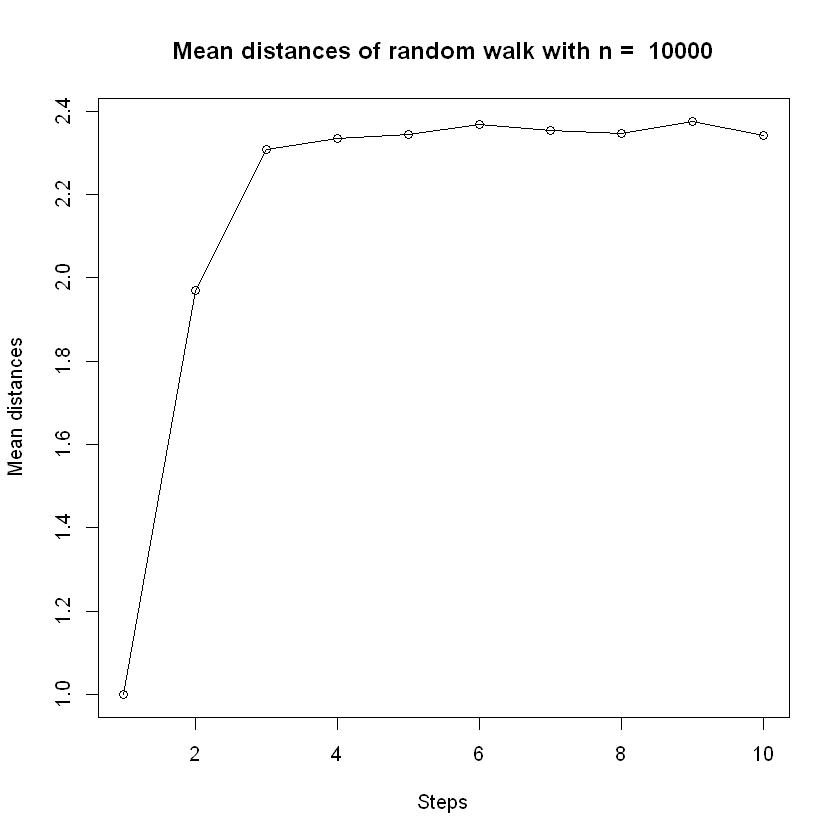

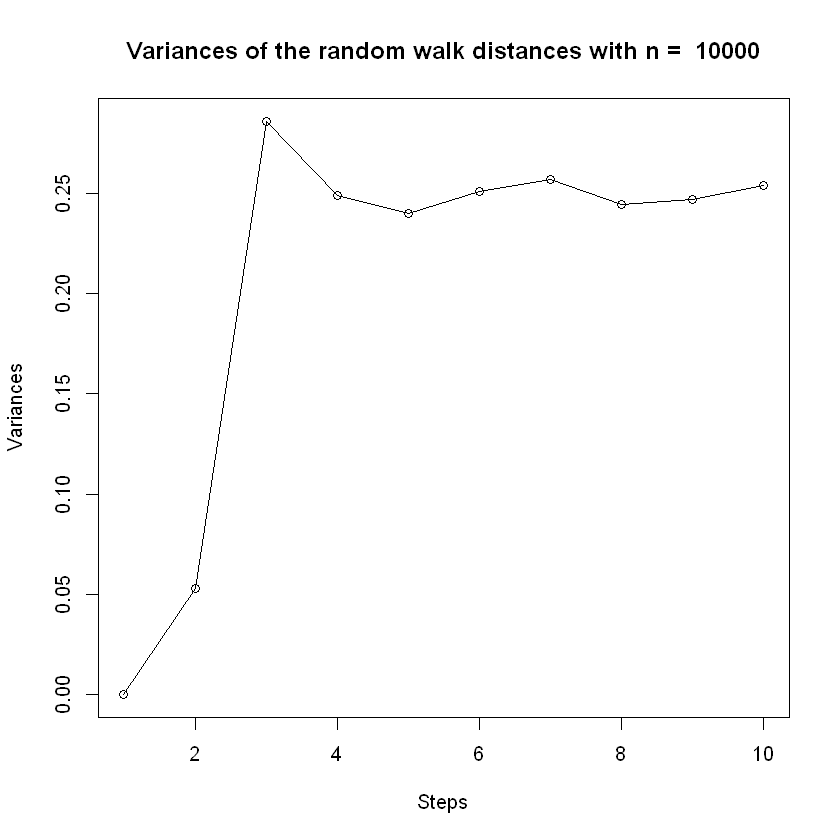

In [4]:
n = 10000
cat("\nResults with n = ", n)
p = 0.01
g = erdos.renyi.game(n, p, directed=FALSE)
ts = seq(1:10) # Number of steps.
iteration_times = 1000

# Random walk on GCC
g.components = clusters(g)
ix = which.max(g.components$csize) # Idx of the largest component
g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC
transition_matrix = create_transition_matrix(g.giant)

cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))

# Find diameter
cur_diameter = diameter(g.giant, directed=FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g.giant), 1)
        last_node = random_walk(g.giant, t, start_node, transition_matrix)
        cur_distance = distances(g.giant, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(ts, avg_distances, type="o", main=paste("Mean distances of random walk with n = ", n), xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main=paste("Variances of the random walk distances with n = ", n), xlab="Steps",ylab="Variances")

#### Question 2

#### (a)

In [180]:
# Generate networks using preferential attachment model
n = 1000
m = 1
g =  barabasi.game(n=n, m=m, directed=FALSE)

# Find diameter
cur_diameter = diameter(g, directed = FALSE)
cat(paste("\nDiameter of the graph: ", cur_diameter))


Diameter of the graph:  19

#### (b)

In [ ]:
ts = seq(1:200) # Number of steps. Diameter too large
iteration_times = 1000

# Store mean and var
avg_distances = c()
var_distances = c()
transition_matrix = create_transition_matrix(g)

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g), 1)
        last_node = random_walk(g, t, start_node, transition_matrix)
        cur_distance = distances(g, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

In [ ]:
plot(ts, avg_distances, type="o", main="Mean distances of random walk", xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main="Variances of the random walk distances", xlab="Steps",ylab="Variances")

#### (c)

In [ ]:
# Store degrees
random_walk_degrees = c()
iteration_times = 1000
t = 200 # Number of steps (Reach steady state)
transition_matrix = create_transition_matrix(g)

for (i in 1:iteration_times)
{
    start_node = sample(vcount(g), 1)
    last_node = random_walk(g, t, start_node, transition_matrix)
    cur_degree = degree(g, last_node)
    random_walk_degrees = c(random_walk_degrees, cur_degree)
}

h = hist(random_walk_degrees, breaks=seq(0, max(random_walk_degrees)), freq=FALSE, main ="Histogram of degree distribution", xlab="Degree")
plot_x = tail(h$breaks, length(h$breaks) - 1) # Remove 0 degree
plot_y = h$density
plot(plot_x, plot_y, main="Degree distribution of the network", xlab="Degree", ylab="Density", type="o")
plot(plot_x, plot_y, log="xy", main="Degree distribution of the network(log-log)", xlab="Degree", ylab="Density")

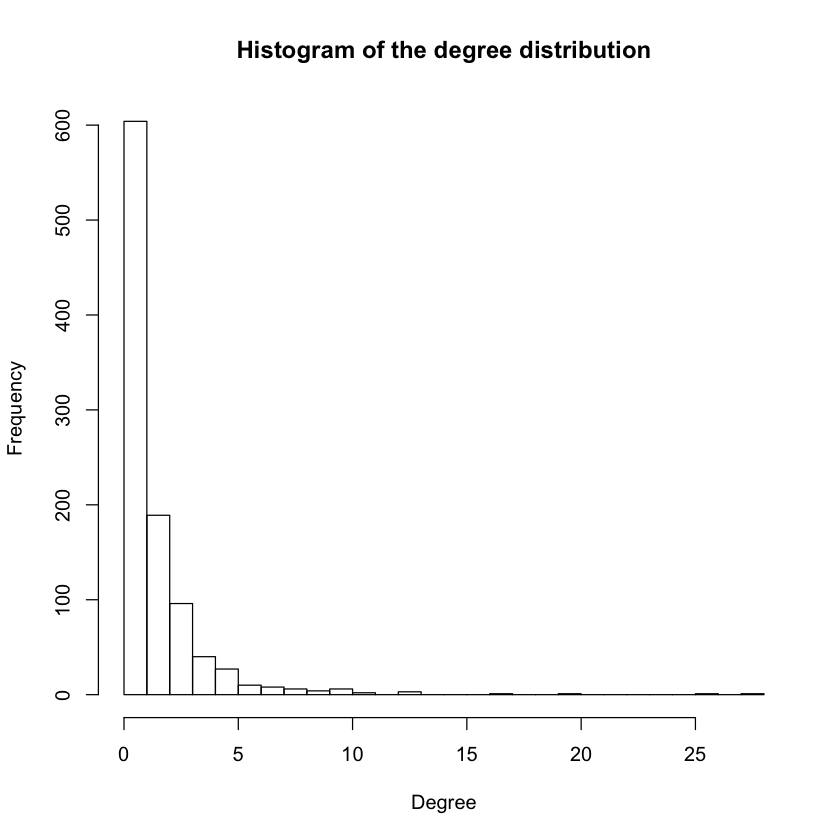

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“11 y values <= 0 omitted from logarithmic plot”

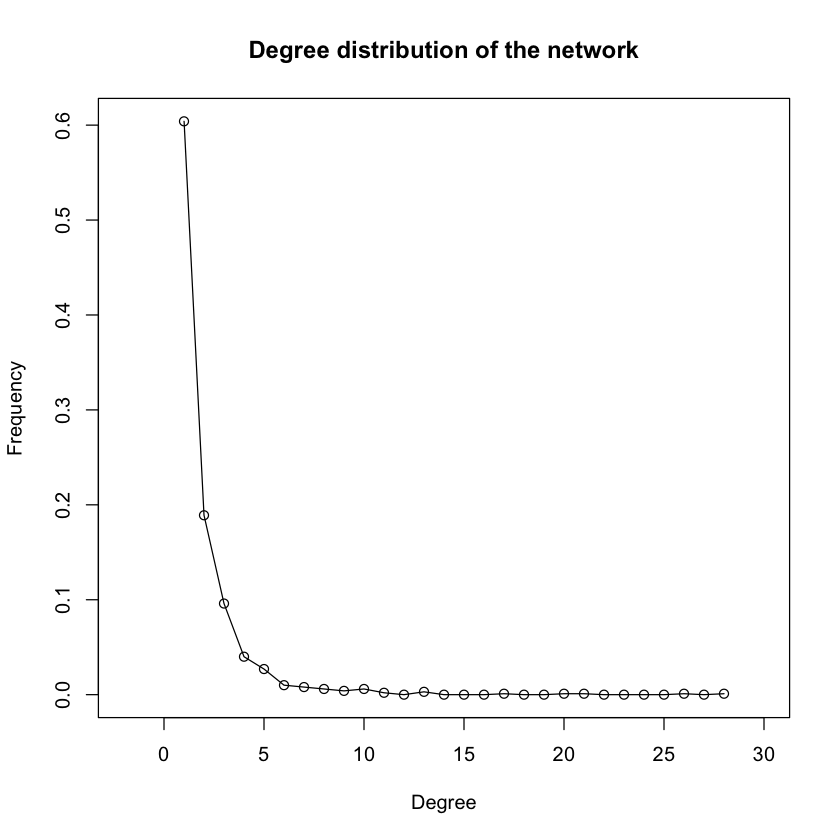

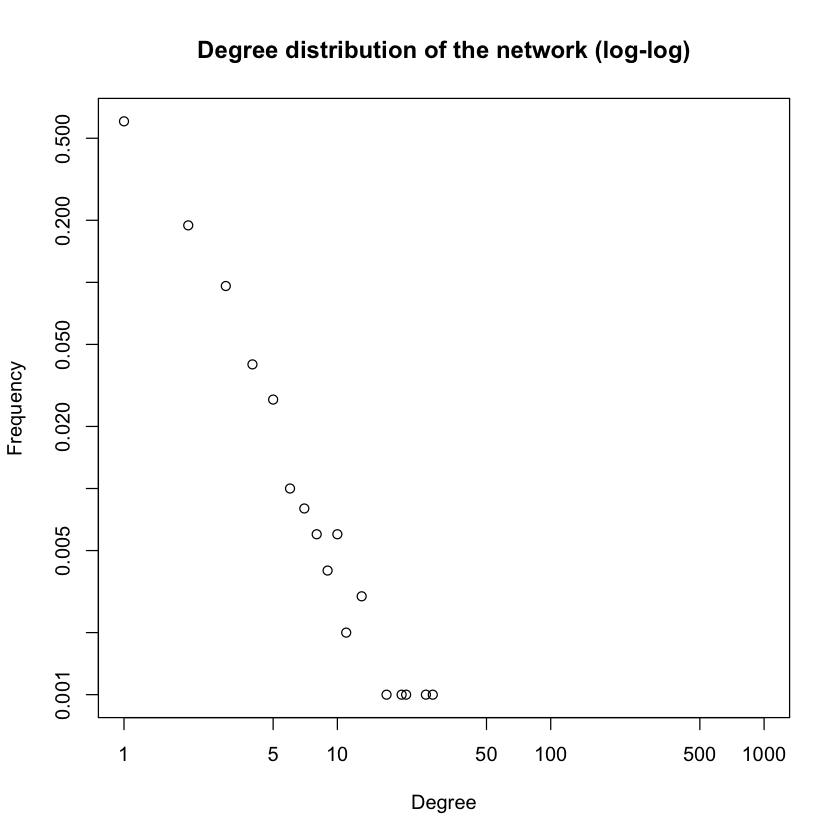

In [181]:
# Degree distribution of the graph
hist(degree(g)[2:length(degree(g))], breaks=seq(0, max(degree(g))), main="Histogram of the degree distribution",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g)[2:length(degree(g))],xlim=c(-2,30), main="Degree distribution of the network",xlab="Degree",ylab="Frequency", type="o")
plot(degree.distribution(g)[2:length(degree(g))], log="xy", main="Degree distribution of the network (log-log)",xlab="Degree",ylab="Frequency")

#### (d)


Results with n =  100
Is the graph connected:  TRUE
Diameter of GCC:  12

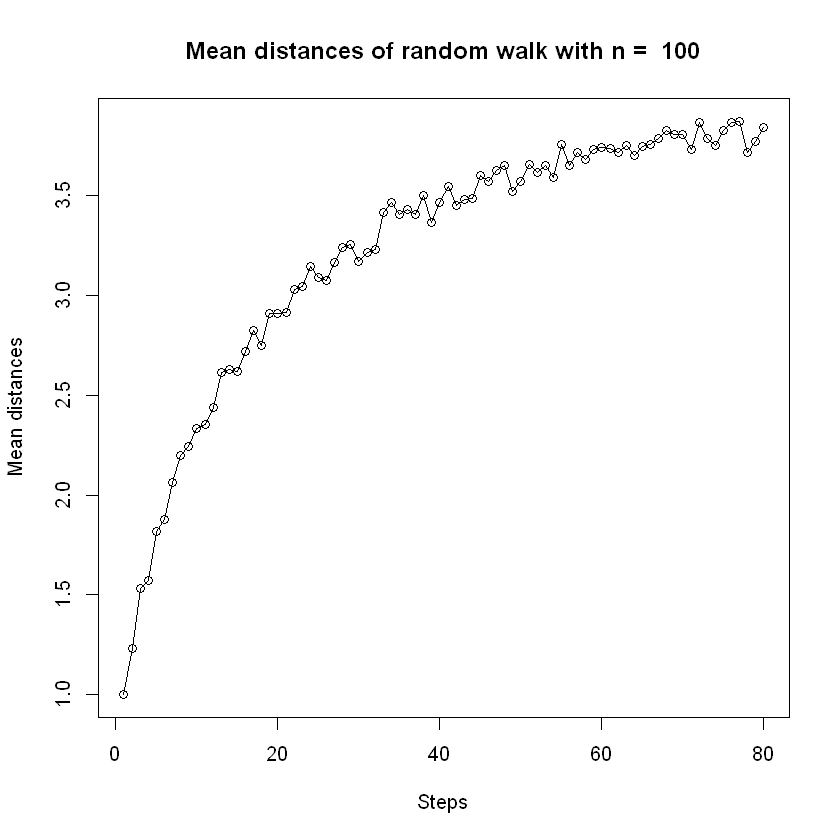

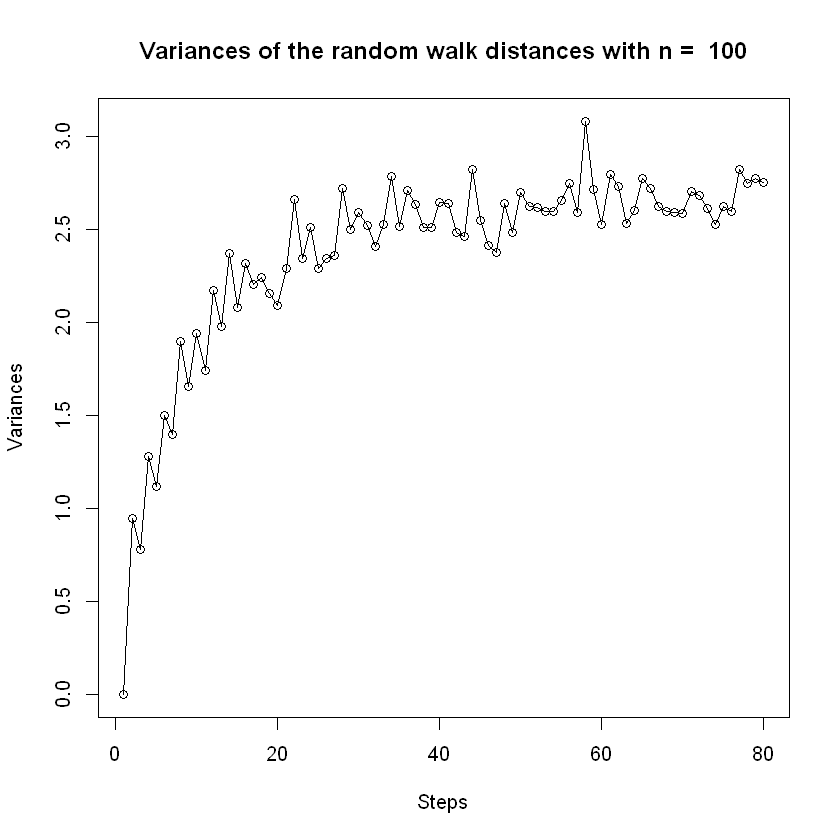

In [14]:
n = 100
cat("\nResults with n = ", n)
m = 1
g =  barabasi.game(n=n, m=m, directed=FALSE)
ts = seq(1:80) # Number of steps.
iteration_times = 1000
transition_matrix = create_transition_matrix(g)

cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))

# Find diameter
cur_diameter = diameter(g.giant, directed=FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g), 1)
        last_node = random_walk(g, t, start_node, transition_matrix)
        cur_distance = distances(g, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(ts, avg_distances, type="o", main=paste("Mean distances of random walk with n = ", n), xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main=paste("Variances of the random walk distances with n = ", n), xlab="Steps",ylab="Variances")


Results with n =  10000
Is the graph connected:  TRUE
Diameter of GCC:  12

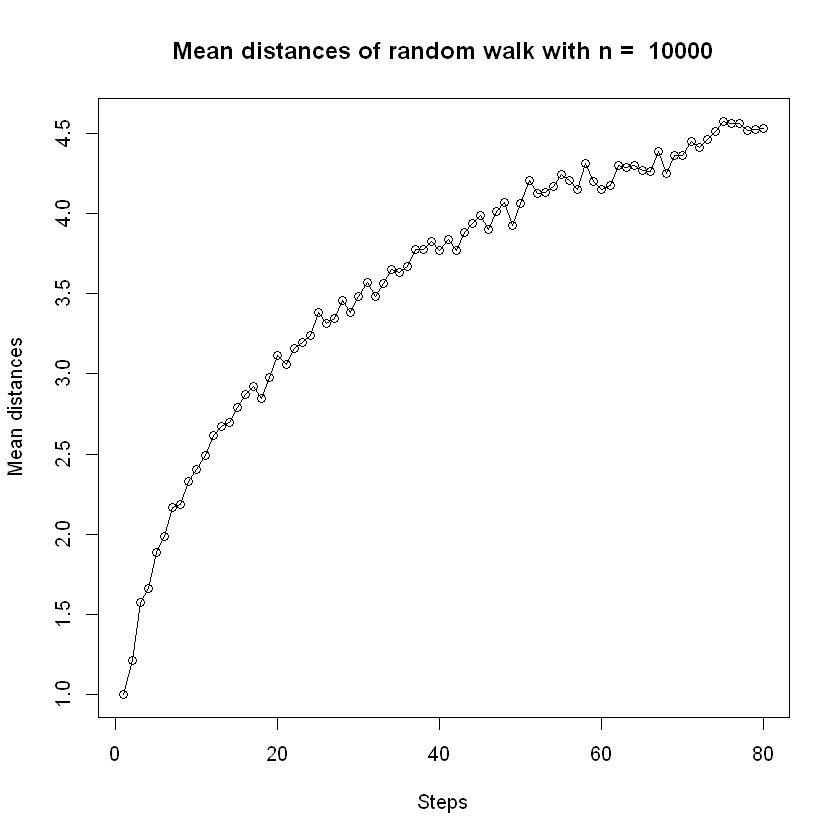

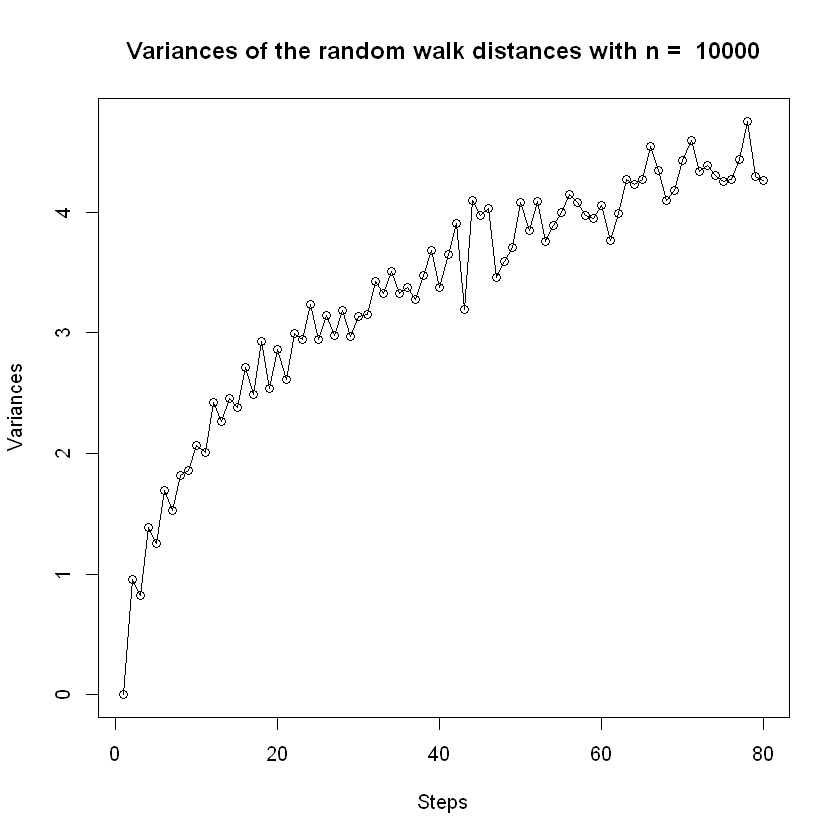

In [16]:
n = 10000
cat("\nResults with n = ", n)
m = 1
g =  barabasi.game(n=n, m=m, directed=FALSE)
ts = seq(1:80) # Number of steps.
iteration_times = 1000
transition_matrix = create_transition_matrix(g)

cur_connected = is.connected(g)
cat(paste('\nIs the graph connected: ', cur_connected))

# Find diameter
cur_diameter = diameter(g.giant, directed=FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g), 1)
        last_node = random_walk(g, t, start_node, transition_matrix)
        cur_distance = distances(g, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(ts, avg_distances, type="o", main=paste("Mean distances of random walk with n = ", n), xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main=paste("Variances of the random walk distances with n = ", n), xlab="Steps",ylab="Variances")

#### Question 3

#### (a)

In [143]:
# Generate networks using preferential attachment model
n = 1000
m = 4
g =  barabasi.game(n=n, m=m, directed=TRUE)

# Find diameter
cur_diameter = diameter(g, directed=FALSE)
cat(paste("\nDiameter of graph: ", cur_diameter))

# Store node freqs
node_freqs = numeric(n)
iteration_times = 1000
t = 20 # Number of steps (Reach steady state)

transition_matrix = create_transition_matrix(g)

for (i in 1:iteration_times)
{
    start_node = sample(vcount(g), 1)
    last_node = random_walk(g, t, start_node, transition_matrix)
    node_freqs[last_node] = node_freqs[last_node] + 1
}
node_freqs = node_freqs / iteration_times # Normalize to get prob.


Diameter of graph:  4

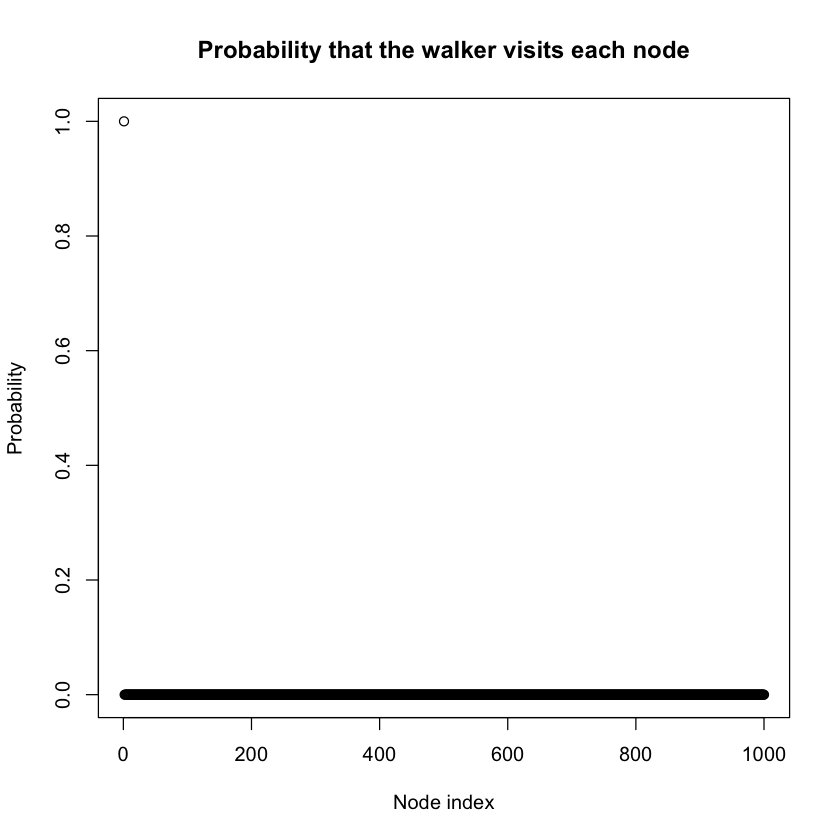


Correlation with degree(g):  0.5674746

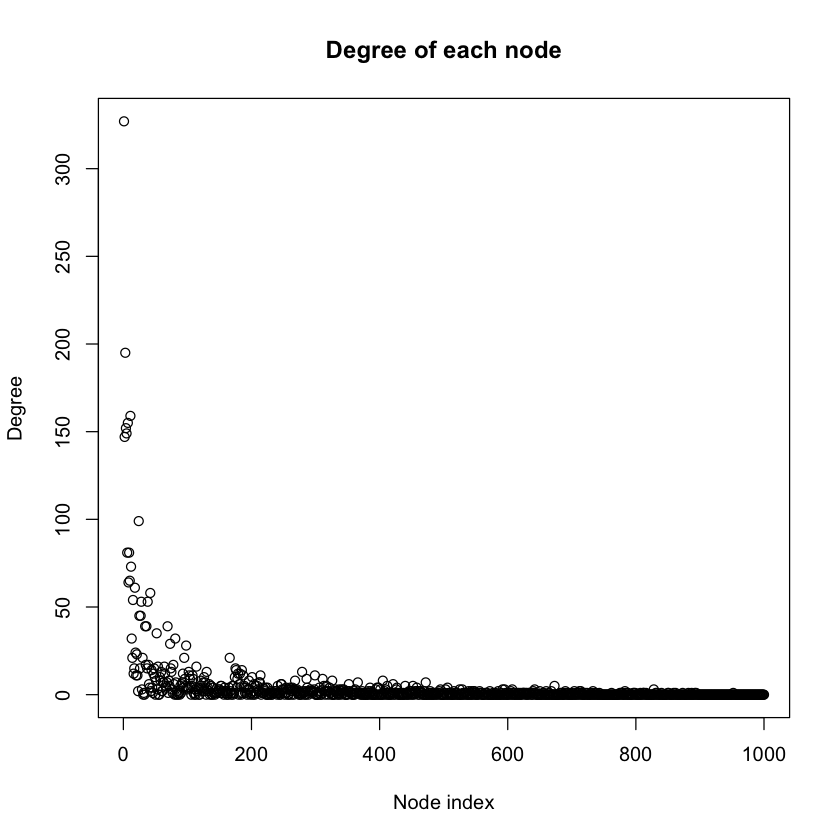

In [144]:
plot(node_freqs, main="Probability that the walker visits each node", xlab="Node index", ylab="Probability")
plot(degree(g,mod="in"), main="Degree of each node", xlab="Node index", ylab="Degree")
cat("\nCorrelation with degree(g): ", cor(degree(g,mod="in"), node_freqs))

#### (b)

In [145]:
# Store node freqs
node_freqs = numeric(n)
iteration_times = 10000
t = 20 # Number of steps (Reach steady state)

alpha = 0.15
transition_matrix = create_transition_matrix(g) * (1 - alpha) + matrix(1 / n, n, n) * alpha # teleportation with equal probability

for (i in 1:iteration_times)
{
    start_node = sample(vcount(g), 1)
    last_node = random_walk(g, t, start_node, transition_matrix)
    node_freqs[last_node] = node_freqs[last_node] + 1
}
node_freqs = node_freqs / iteration_times # Normalize to get prob.


Correlation with degree(g):  0.6391381

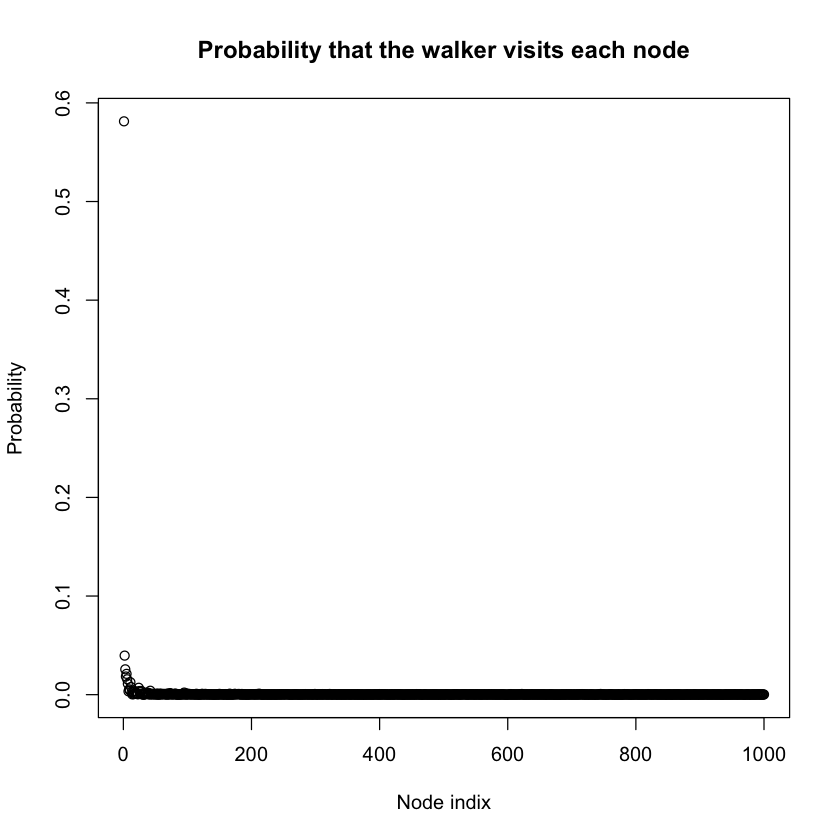

In [146]:
plot(node_freqs, main="Probability that the walker visits each node", xlab="Node indix", ylab="Probability")
cat("\nCorrelation with degree(g): ", cor(degree(g,mod="in"), node_freqs))

#### Question 4

#### (a)

In [147]:
# Store node freqs

node_freqs = numeric(n)
iteration_times = 10000
t = 20 # Number of steps (Reach steady state)

alpha = 0.15
# tel_vector = page_rank(g)$vector

transition_matrix = create_transition_matrix(g) * (1 - alpha) + diag(n) * alpha # teleportation proportional to the node’s PageRank

for (i in 1:iteration_times)
{
    start_node = sample(vcount(g), 1)
    last_node = random_walk(g, t, start_node, transition_matrix)
    node_freqs[last_node] = node_freqs[last_node] + 1
}
node_freqs = node_freqs / iteration_times # Normalize to get prob.


Correlation with degree(g):  0.5674746

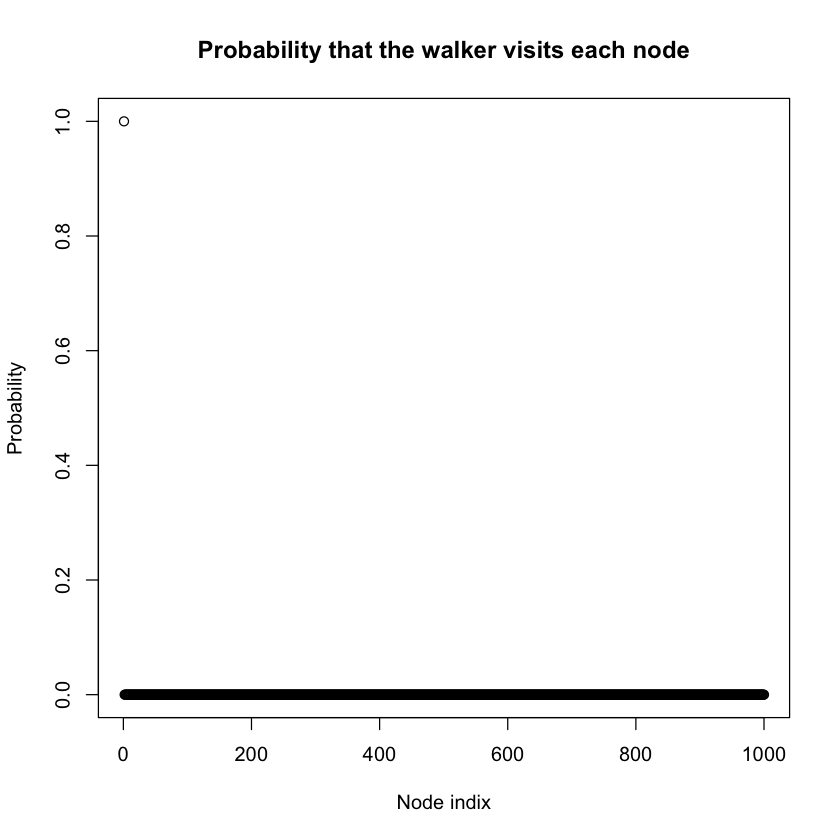

In [148]:
plot(node_freqs, main="Probability that the walker visits each node", xlab="Node indix", ylab="Probability")
cat("\nCorrelation with degree(g): ", cor(degree(g,mod="in"), node_freqs))


#### (b)

In [149]:
# Store node freqs
node_freqs = numeric(n)
iteration_times = 10000
t = 20 # Number of steps (Reach steady state)

alpha = 0.15
# page_rank_order = order(page_rank(g)$vector)
tel_vector = matrix(0, 1, n)
tel_vector[n / 2] = 0.5
tel_vector[n / 2 + 1] = 0.5

transition_matrix = create_transition_matrix(g) * (1 - alpha) + repmat(tel_vector,n,1) * alpha # teleportation

for (i in 1:iteration_times)
{
    start_node = sample(vcount(g), 1)
    last_node = random_walk(g, t, start_node, transition_matrix)
    node_freqs[last_node] = node_freqs[last_node] + 1
}
node_freqs = node_freqs / iteration_times # Normalize to get prob.


Correlation with degree(g):  0.6333448

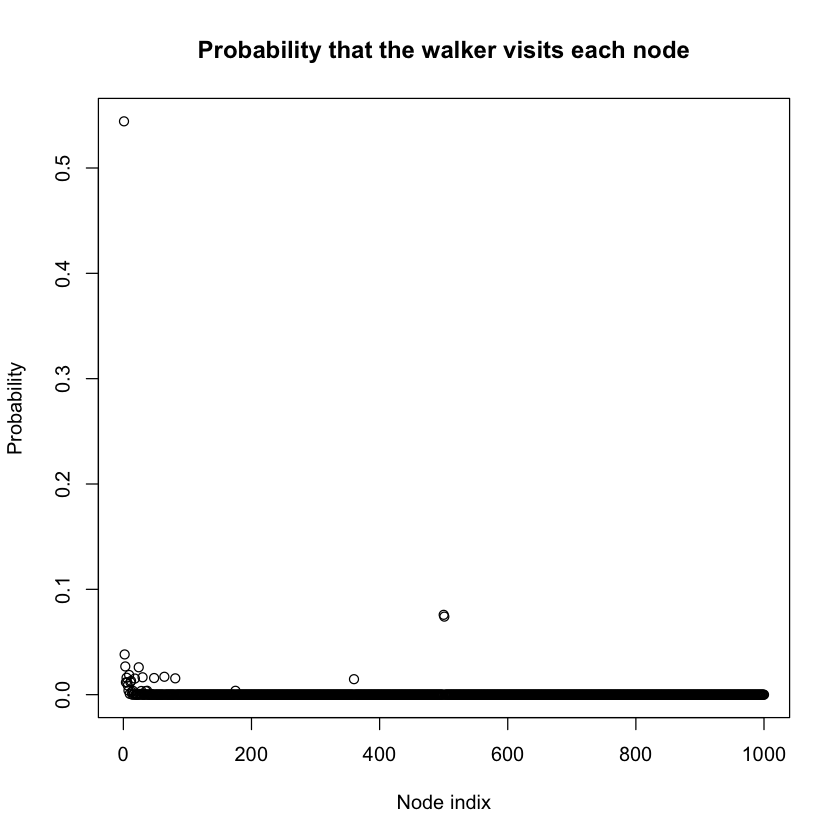

In [150]:
plot(node_freqs, main="Probability that the walker visits each node", xlab="Node indix", ylab="Probability")
cat("\nCorrelation with degree(g): ", cor(degree(g,mod="in"), node_freqs))
